# Компʼютерний практикум №6
Виконав студент групи ЗК-41мп Гломозда Костянтин

НЕЙРОННА МЕРЕЖА ДЛЯ ЗАДАЧІ РЕГРЕСІЇ

In [160]:
! pip install matplotlib --quiet

## Завдання 1

1) Підготовка даних

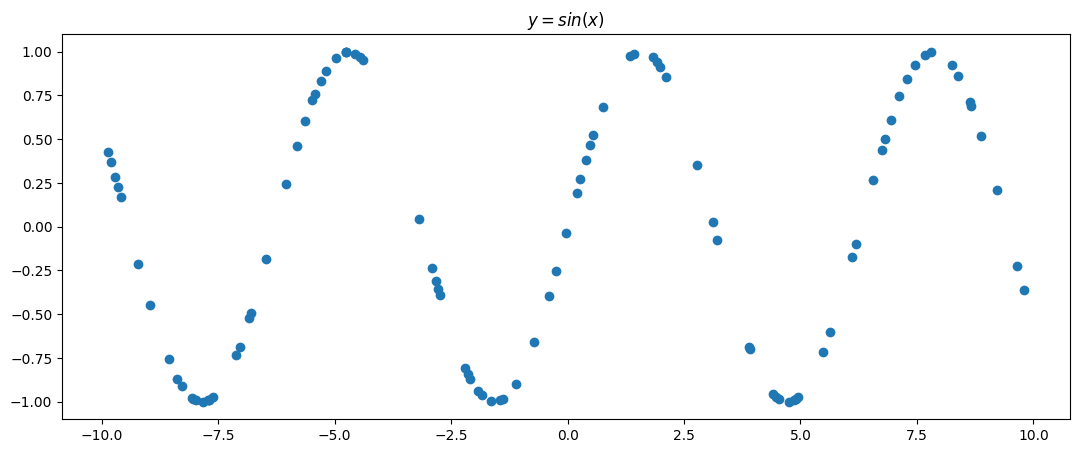

In [161]:
import torch
import matplotlib.pyplot as plt
import matplotlib


matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

x_train = torch.rand(100)
x_train = x_train * 20.0 - 10.0
y_train = torch.sin(x_train)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$')
plt.show()

2. Створємо шум

(100,)


Text(0.5, 1.0, 'Gaussian noise')

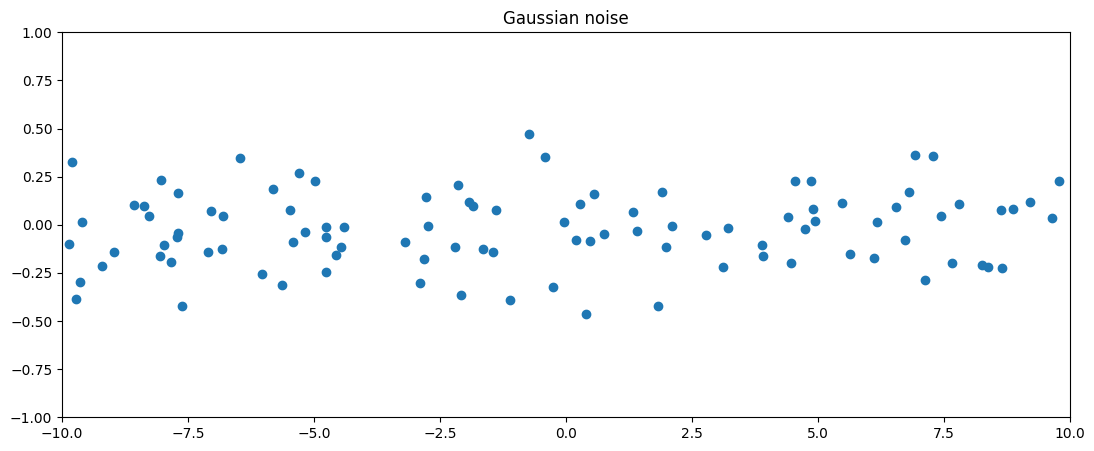

In [162]:
noise = torch.randn(y_train.shape) / 5.
print(x_train.numpy().shape)

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise')

3. Додаємо шум

Text(0, 0.5, 'y_train')

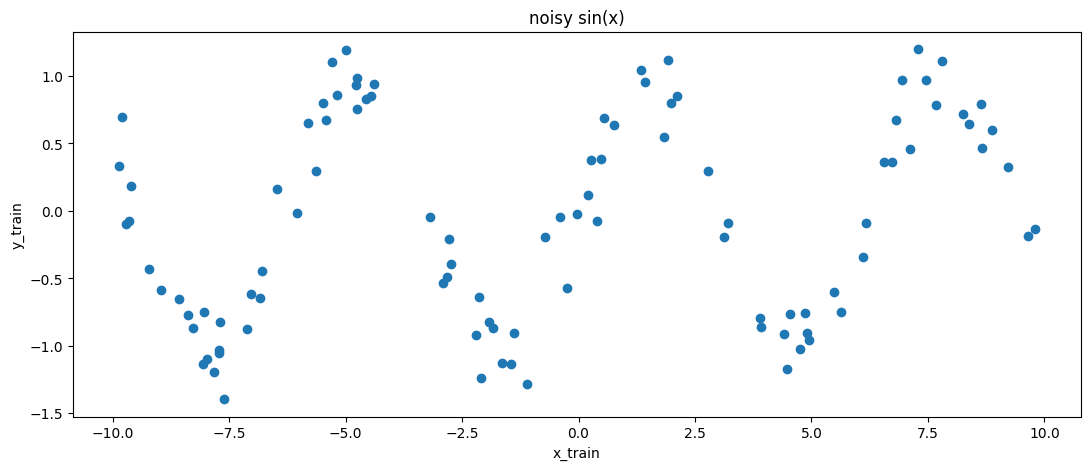

In [163]:
y_train = y_train + noise

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train')

4. Узагальнюємо розмірності

In [164]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

print(x_train.shape)
print(y_train.shape)

torch.Size([100, 1])
torch.Size([100, 1])


5. Створємо валідаційну вибірку

Text(0, 0.5, 'y_validation')

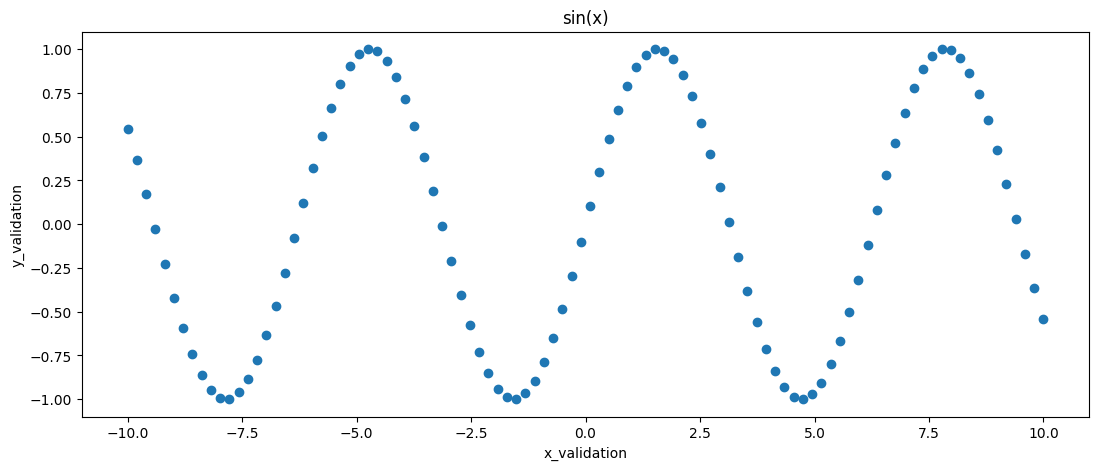

In [165]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)

plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation')

6. Узагальнюємо розмірності

In [166]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[ 0.5440],
        [ 0.3646],
        [ 0.1703],
        [-0.0308],
        [-0.2308],
        [-0.4213],
        [-0.5947],
        [-0.7439],
        [-0.8629],
        [-0.9467],
        [-0.9921],
        [-0.9971],
        [-0.9615],
        [-0.8869],
        [-0.7761],
        [-0.6338],
        [-0.4658],
        [-0.2787],
        [-0.0804],
        [ 0.1213],
        [ 0.3180],
        [ 0.5017],
        [ 0.6651],
        [ 0.8014],
        [ 0.9051],
        [ 0.9720],
        [ 0.9994],
        [ 0.9861],
        [ 0.9327],
        [ 0.8414],
        [ 0.7158],
        [ 0.5612],
        [ 0.3837],
        [ 0.1906],
        [-0.0103],
        [-0.2107],
        [-0.4026],
        [-0.5781],
        [-0.7300],
        [-0.8523],
        [-0.9399],
        [-0.9893],
        [-0.9985],
        [-0.9670],
        [-0.8962],
        [-0.7889],
        [-0.6496],
        [-0.4839],
        [-0.2984],
        [-0.1008],
        [ 0.1008],
        [ 0.2984],
        [ 0.

7. Створимо функцію передбачення

In [167]:
def predict(net, x, y):
    y_pred = net.forward(x)
    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

8. Створюємо одразу 10 мереж з різною кількістю нейронів та функцією активації tanh

SineNet(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=1, out_features=1, bias=True)
)

SineNet(
  (fc1): Linear(in_features=1, out_features=2, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)
...
SineNet(
  (fc1): Linear(in_features=1, out_features=9, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=9, out_features=1, bias=True)
)

SineNet(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


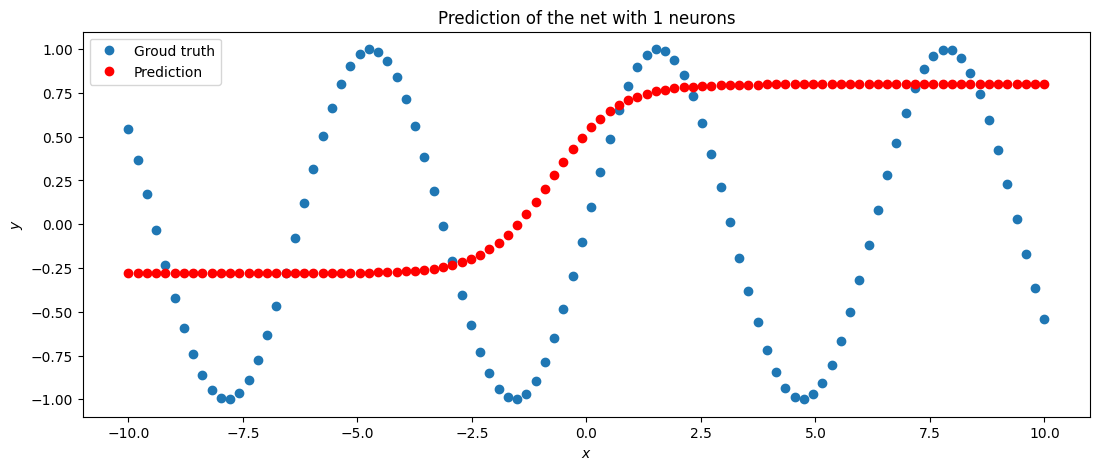

In [168]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, activate=torch.nn.Tanh()):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        # Функція активації
        self.act1 = activate
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        return x

nets_tanh_1_hidden = [SineNet(n_neurons) for n_neurons in range(1, 11)]
print(*nets_tanh_1_hidden[:2], sep='\n\n')
print('...')
print(*nets_tanh_1_hidden[-2:], sep='\n\n')

predict(nets_tanh_1_hidden[0], x_validation, y_validation)
plt.title(f'Prediction of the net with {nets_tanh_1_hidden[0].fc1.out_features} neurons')
plt.show()

9. Навчаємо мережі

In [169]:
def loss(pred, target):
    squares = (pred - target) ** 2
    return squares.mean()

In [170]:
def train(net, x_train, y_train, epochs):
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    loss_values = []
    for i in range(epochs):
        optimizer.zero_grad()
        y_pred = net.forward(x_train)
        loss_val = loss(y_pred, y_train)
        loss_val.backward()
        optimizer.step()
        loss_values.append(loss_val.item())
        if (i+1) % (epochs / 10) == 0:
            print(f'Epoch {i+1}, Loss {loss_val.item()}')

    plt.plot(range(epochs), loss_values)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Залежність втрат від кількості епох')
    plt.show()
    
    predict(net, x_validation, y_validation)

Можемо помітити, що зі збільшенням нейронів покращується результат навчання мережі

Neurons: 1
Epoch 100, Loss 0.5286594033241272
Epoch 200, Loss 0.5269515514373779
Epoch 300, Loss 0.5261537432670593
Epoch 400, Loss 0.5256929397583008
Epoch 500, Loss 0.5253910422325134


Epoch 600, Loss 0.5251755714416504
Epoch 700, Loss 0.5250118970870972
Epoch 800, Loss 0.5248816013336182
Epoch 900, Loss 0.5247741341590881
Epoch 1000, Loss 0.5246831774711609


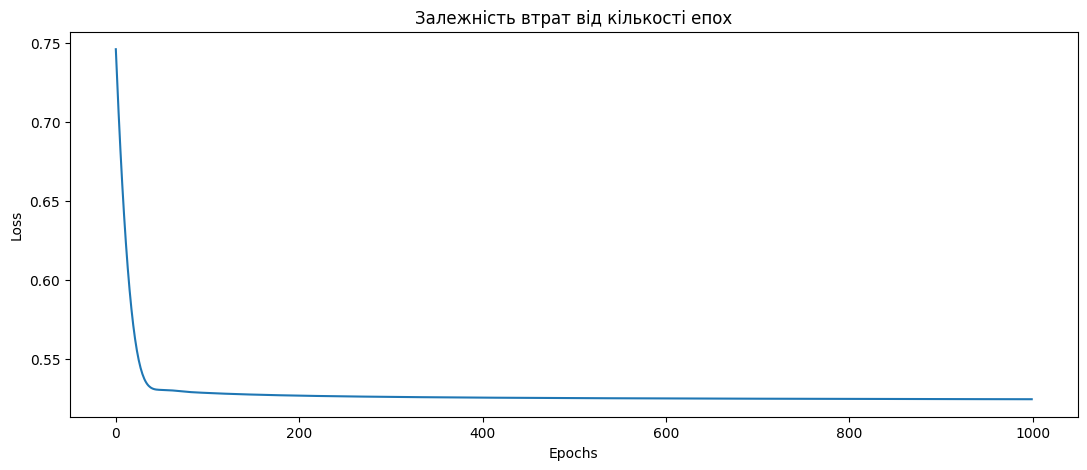

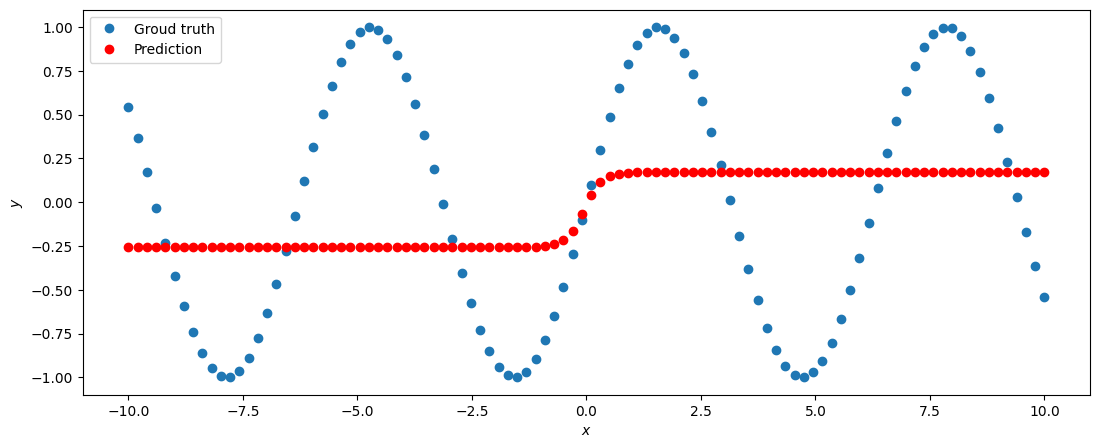

Neurons: 2
Epoch 100, Loss 0.535068690776825
Epoch 200, Loss 0.5301783084869385
Epoch 300, Loss 0.5050410628318787
Epoch 400, Loss 0.44779080152511597
Epoch 500, Loss 0.43382683396339417
Epoch 600, Loss 0.4307420253753662
Epoch 700, Loss 0.4298076331615448
Epoch 800, Loss 0.42940306663513184
Epoch 900, Loss 0.42901620268821716
Epoch 1000, Loss 0.42797794938087463


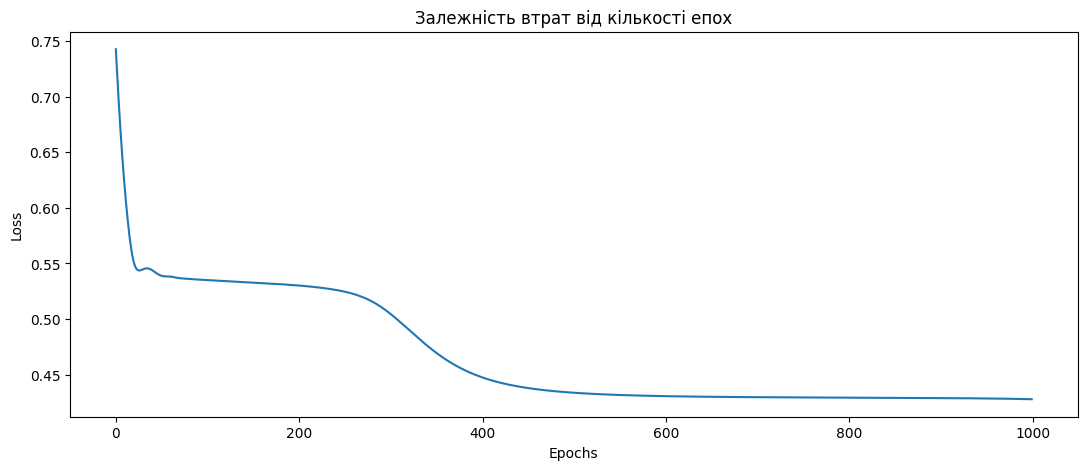

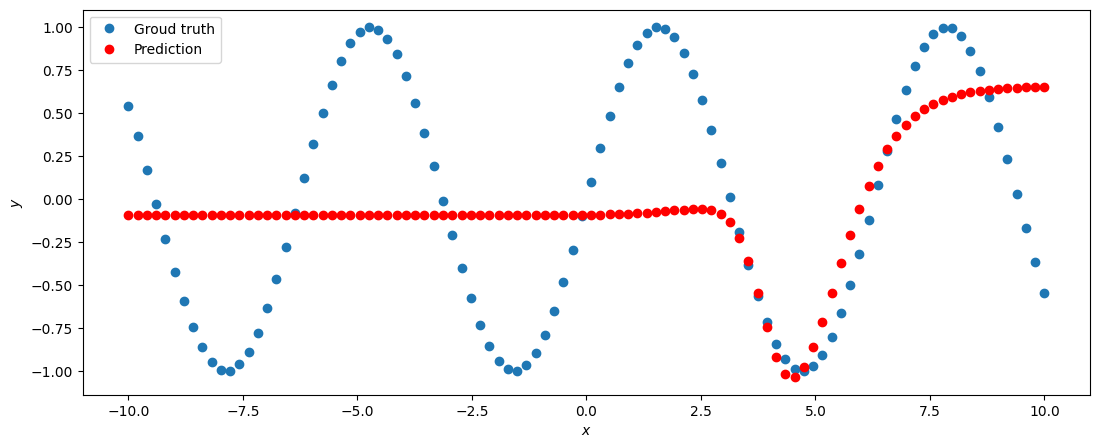

Neurons: 3
Epoch 100, Loss 0.5262644290924072
Epoch 200, Loss 0.5253888368606567
Epoch 300, Loss 0.5250060558319092
Epoch 400, Loss 0.5247682929039001
Epoch 500, Loss 0.5246008038520813
Epoch 600, Loss 0.5244733691215515
Epoch 700, Loss 0.5243717432022095
Epoch 800, Loss 0.5242878198623657
Epoch 900, Loss 0.5242171287536621
Epoch 1000, Loss 0.524156391620636


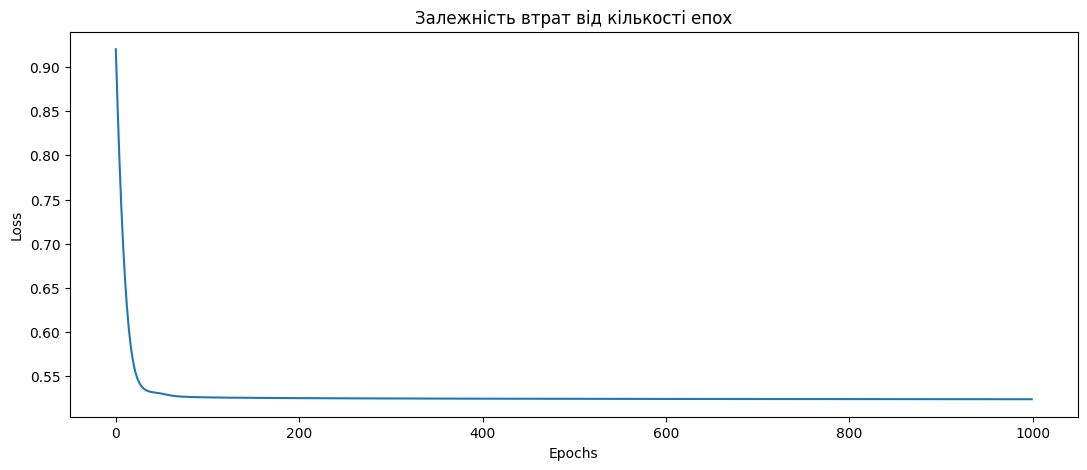

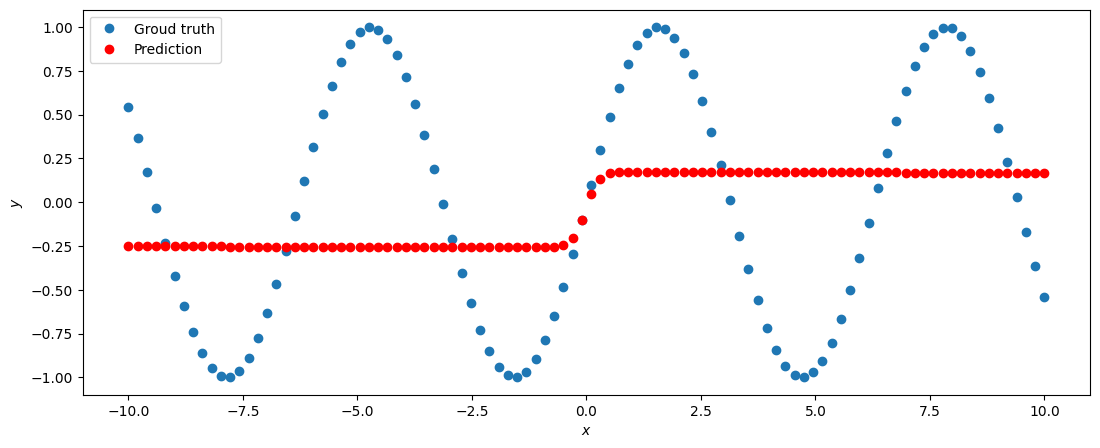

Neurons: 4
Epoch 100, Loss 0.4755454957485199
Epoch 200, Loss 0.4415975511074066
Epoch 300, Loss 0.37629714608192444
Epoch 400, Loss 0.33334246277809143
Epoch 500, Loss 0.3146931827068329
Epoch 600, Loss 0.3081868588924408
Epoch 700, Loss 0.30523502826690674
Epoch 800, Loss 0.30315592885017395
Epoch 900, Loss 0.3009737730026245
Epoch 1000, Loss 0.2986510097980499


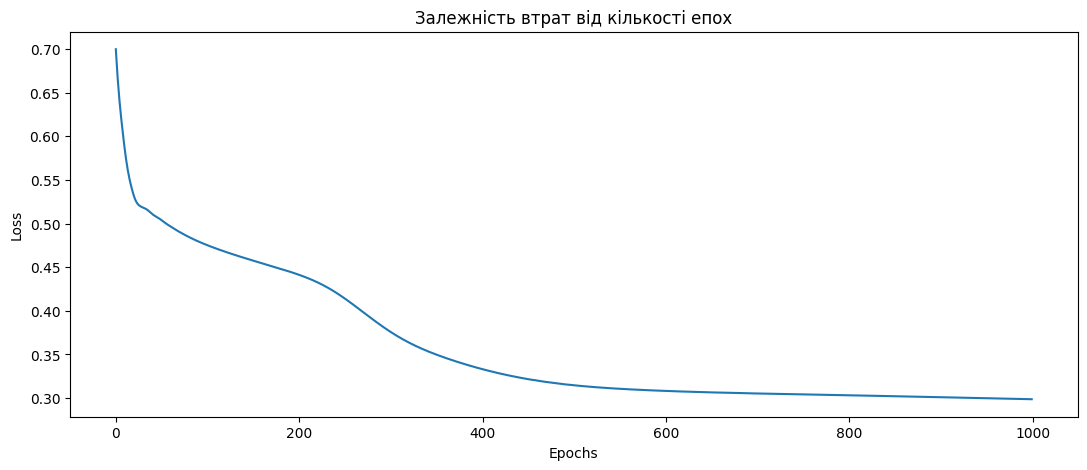

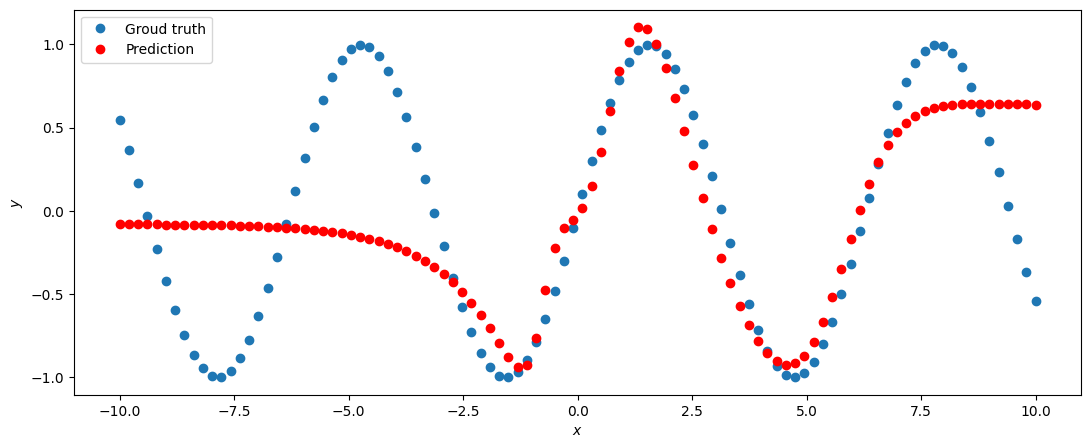

Neurons: 5
Epoch 100, Loss 0.48356133699417114
Epoch 200, Loss 0.46503546833992004
Epoch 300, Loss 0.4463127553462982
Epoch 400, Loss 0.43252021074295044
Epoch 500, Loss 0.4248170554637909
Epoch 600, Loss 0.4213683307170868
Epoch 700, Loss 0.4199520945549011
Epoch 800, Loss 0.4193568527698517
Epoch 900, Loss 0.41906479001045227
Epoch 1000, Loss 0.41886672377586365


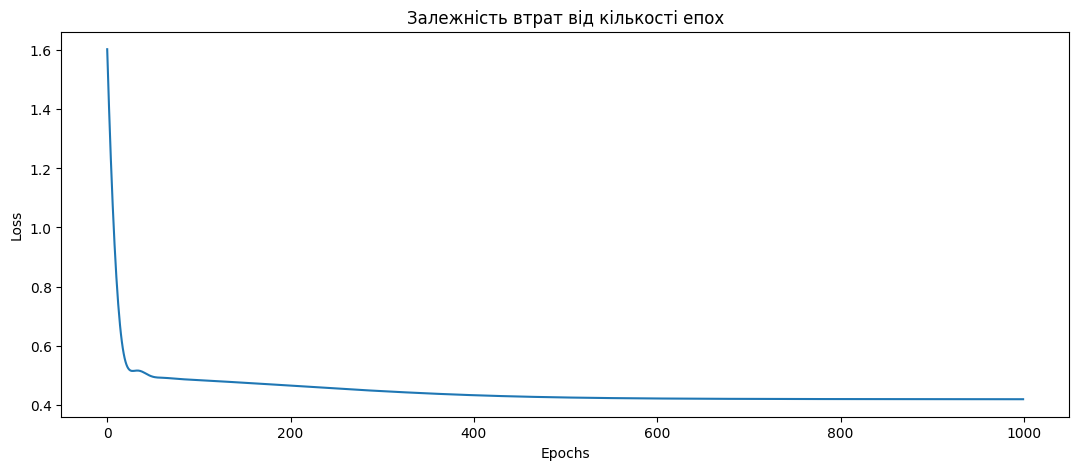

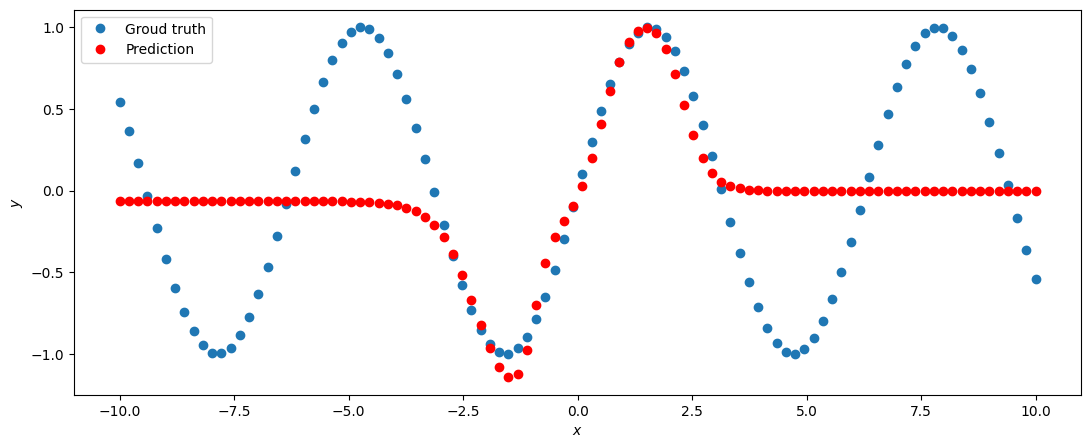

Neurons: 6
Epoch 100, Loss 0.5009732842445374
Epoch 200, Loss 0.4844527840614319
Epoch 300, Loss 0.4758022725582123
Epoch 400, Loss 0.3876197040081024
Epoch 500, Loss 0.3459939956665039
Epoch 600, Loss 0.33418217301368713
Epoch 700, Loss 0.3029971420764923
Epoch 800, Loss 0.2848498225212097
Epoch 900, Loss 0.2821536362171173
Epoch 1000, Loss 0.2810506522655487


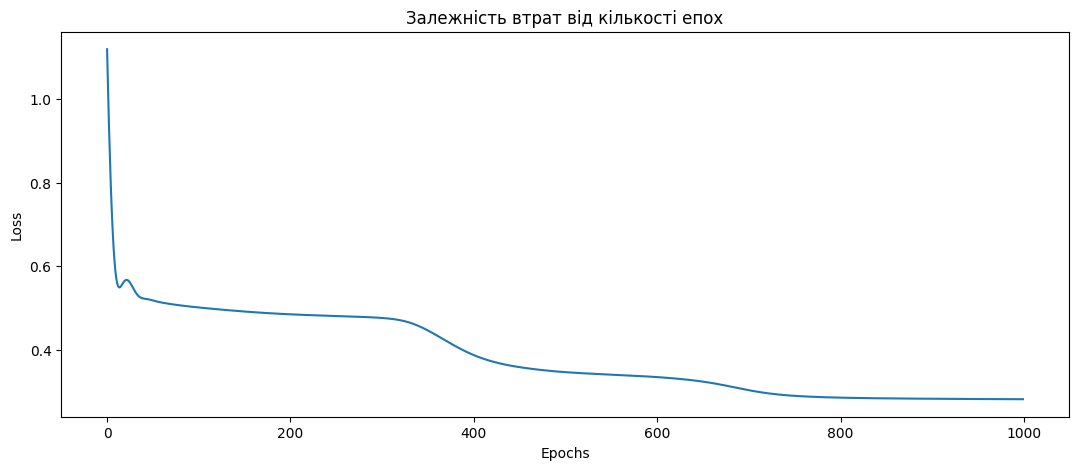

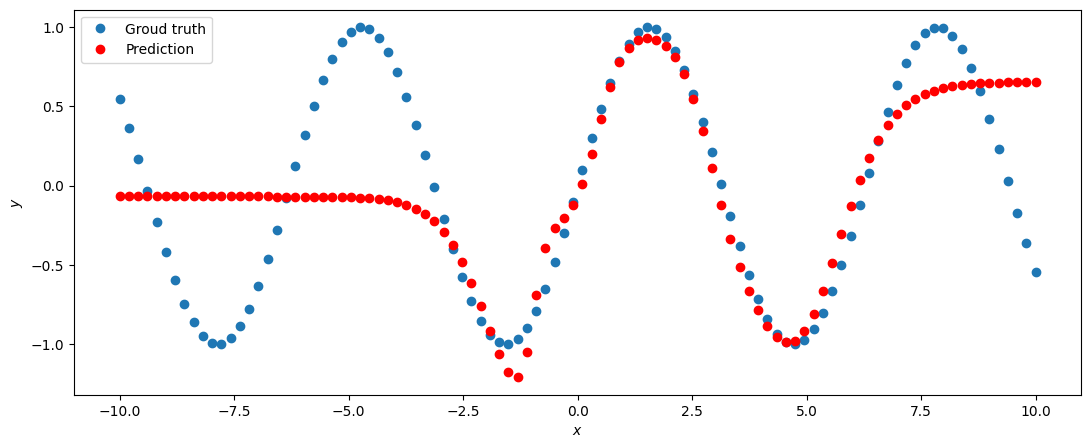

Neurons: 7
Epoch 100, Loss 0.4144844114780426
Epoch 200, Loss 0.24282456934452057
Epoch 300, Loss 0.14836598932743073
Epoch 400, Loss 0.1303417831659317
Epoch 500, Loss 0.12590351700782776
Epoch 600, Loss 0.12228979915380478
Epoch 700, Loss 0.11870858073234558
Epoch 800, Loss 0.10761252045631409
Epoch 900, Loss 0.09452945739030838
Epoch 1000, Loss 0.08734755218029022


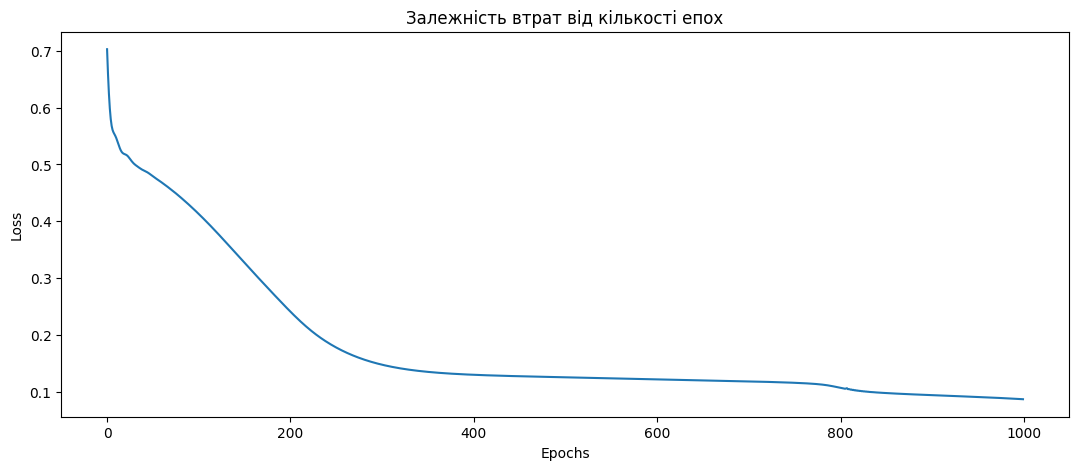

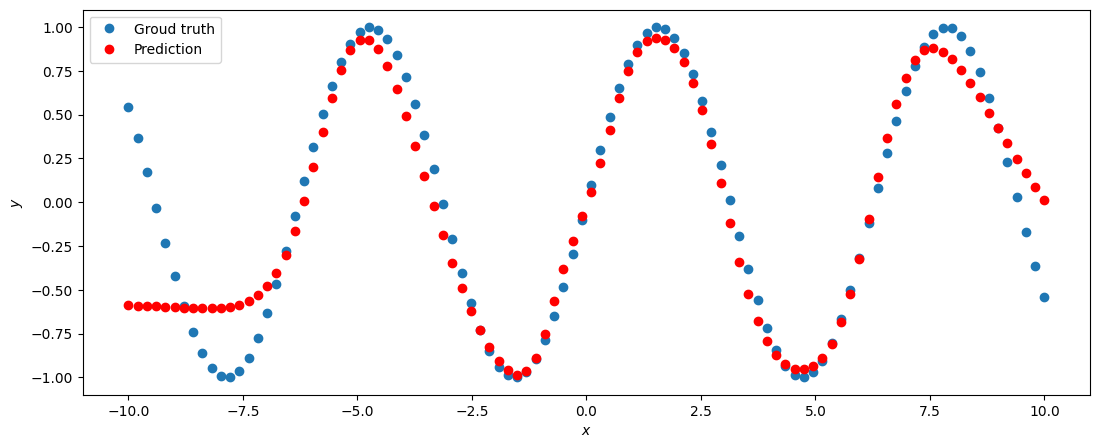

Neurons: 8
Epoch 100, Loss 0.45854800939559937
Epoch 200, Loss 0.33229178190231323
Epoch 300, Loss 0.19418813288211823
Epoch 400, Loss 0.1386437565088272
Epoch 500, Loss 0.12519262731075287
Epoch 600, Loss 0.1202632337808609
Epoch 700, Loss 0.11700759828090668
Epoch 800, Loss 0.11459098756313324
Epoch 900, Loss 0.112456314265728
Epoch 1000, Loss 0.07742684334516525


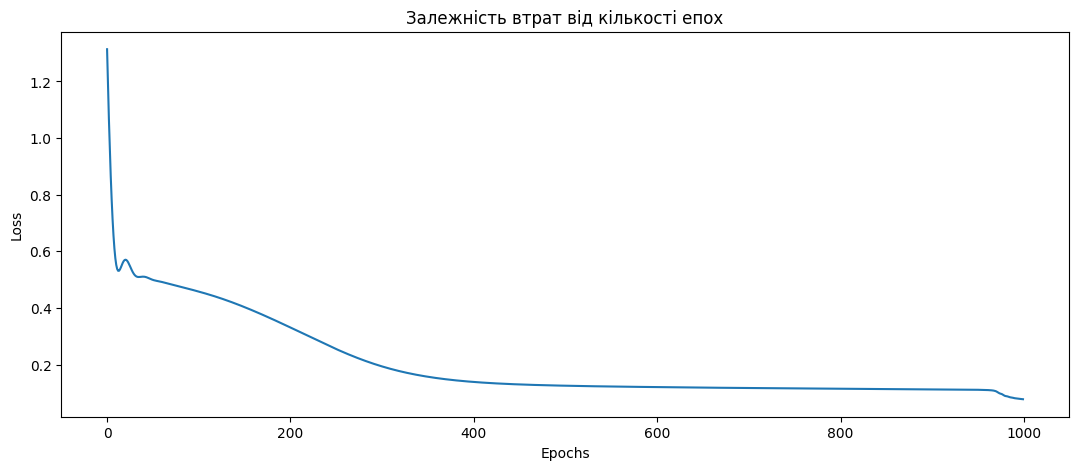

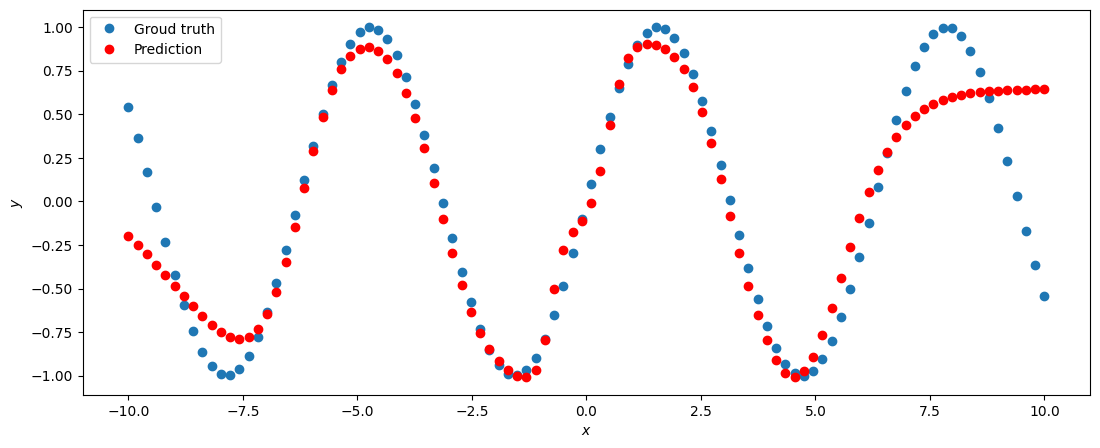

Neurons: 9
Epoch 100, Loss 0.3679475784301758
Epoch 200, Loss 0.17582139372825623
Epoch 300, Loss 0.12407010793685913
Epoch 400, Loss 0.10575396567583084
Epoch 500, Loss 0.07898503541946411
Epoch 600, Loss 0.06411327421665192
Epoch 700, Loss 0.06037766486406326
Epoch 800, Loss 0.059212103486061096
Epoch 900, Loss 0.05842333287000656
Epoch 1000, Loss 0.057667121291160583


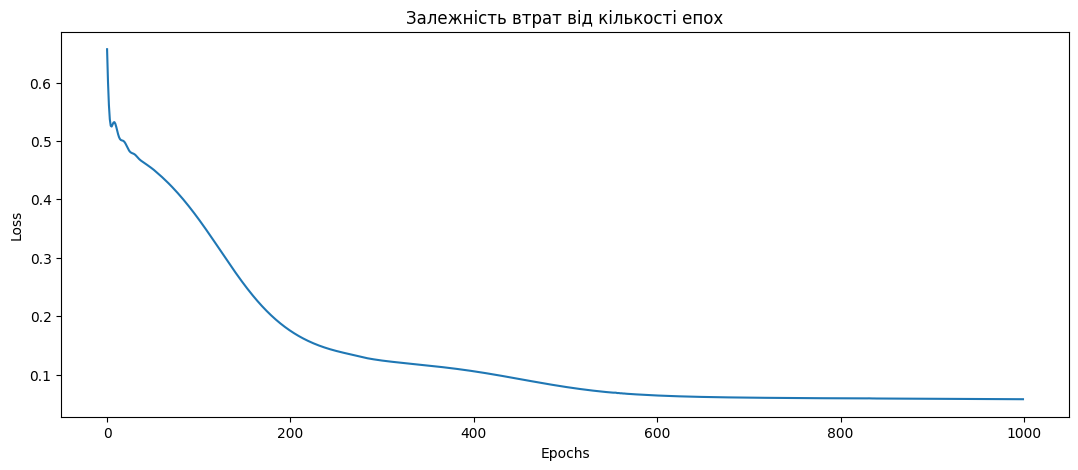

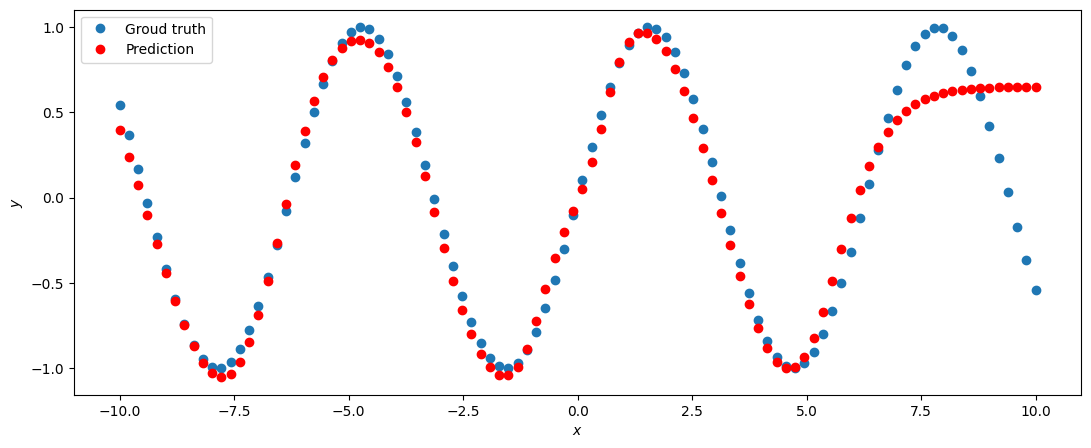

Neurons: 10
Epoch 100, Loss 0.3864783048629761
Epoch 200, Loss 0.30310142040252686
Epoch 300, Loss 0.2570883631706238
Epoch 400, Loss 0.23067066073417664
Epoch 500, Loss 0.2144155502319336
Epoch 600, Loss 0.2036685347557068
Epoch 700, Loss 0.19574600458145142
Epoch 800, Loss 0.19013139605522156
Epoch 900, Loss 0.18569938838481903
Epoch 1000, Loss 0.1821829229593277


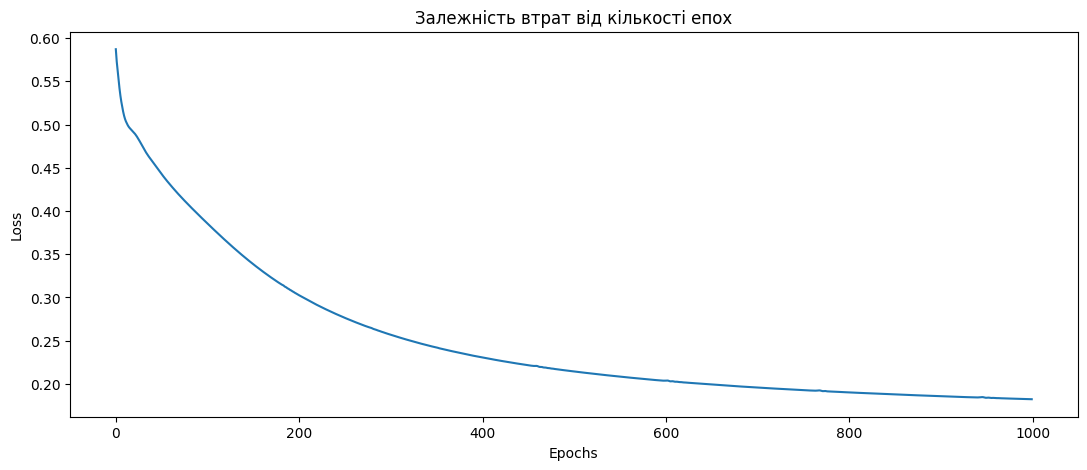

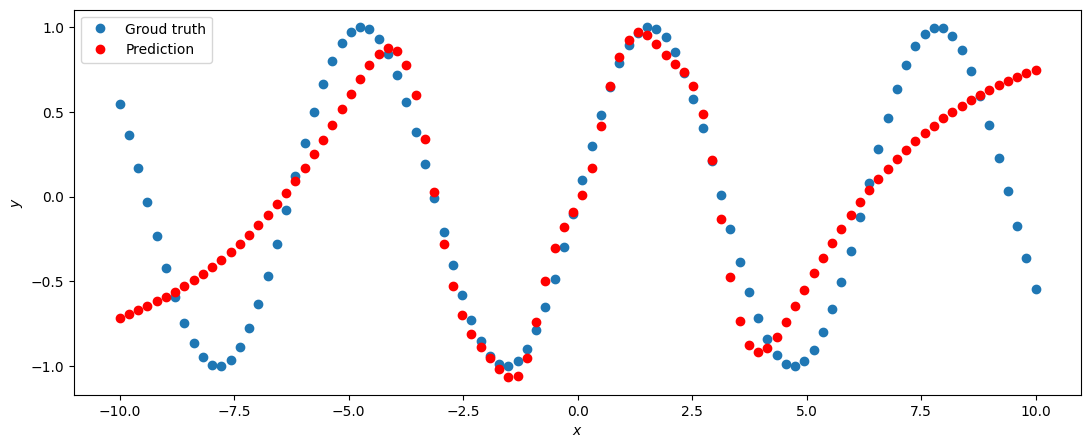

In [171]:
for net in nets_tanh_1_hidden:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 1000)
    plt.show()

Збільшимо кількість епох навчання. Можемо помітити, що на 8 нейронів результат вийшов найкращим, але взагалом це не дало великий вплив

Neurons: 1
Epoch 200, Loss 0.5240100622177124
Epoch 400, Loss 0.5238370299339294
Epoch 600, Loss 0.5237587094306946
Epoch 800, Loss 0.5237137079238892
Epoch 1000, Loss 0.5236840844154358
Epoch 1200, Loss 0.5236627459526062
Epoch 1400, Loss 0.5236465334892273
Epoch 1600, Loss 0.5236337780952454
Epoch 1800, Loss 0.5236235857009888
Epoch 2000, Loss 0.5236152410507202


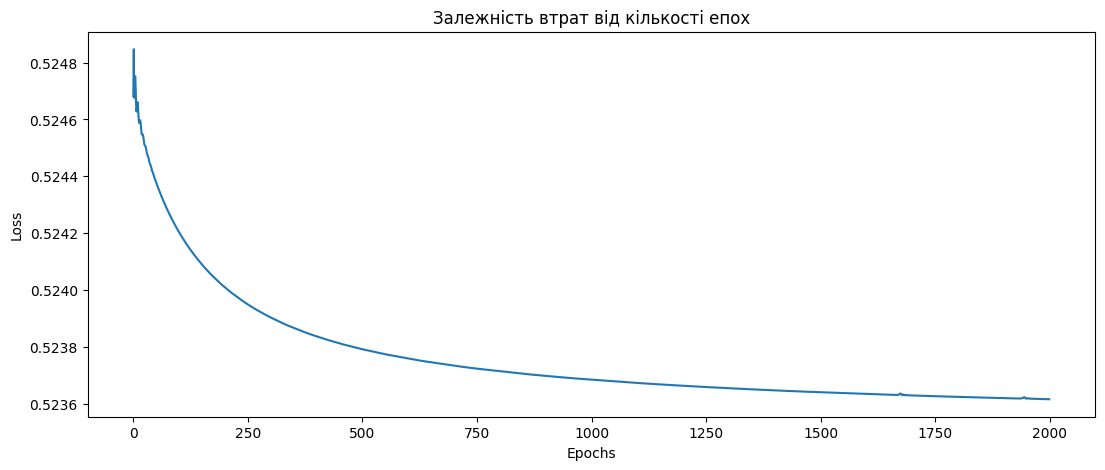

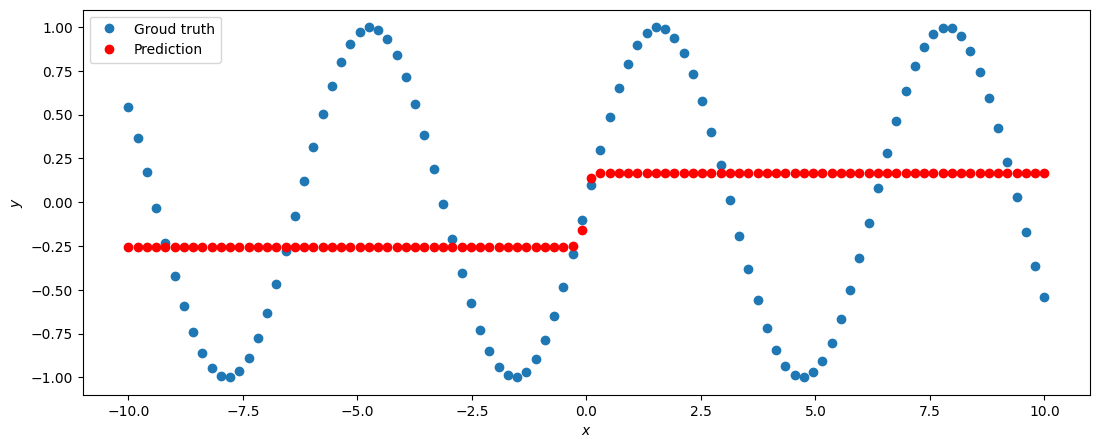

Neurons: 2
Epoch 200, Loss 0.37548020482063293
Epoch 400, Loss 0.3686082363128662
Epoch 600, Loss 0.3664870858192444
Epoch 800, Loss 0.3654308021068573
Epoch 1000, Loss 0.3647714853286743
Epoch 1200, Loss 0.3643288016319275
Epoch 1400, Loss 0.36409828066825867
Epoch 1600, Loss 0.3637673556804657
Epoch 1800, Loss 0.36403435468673706
Epoch 2000, Loss 0.36342552304267883


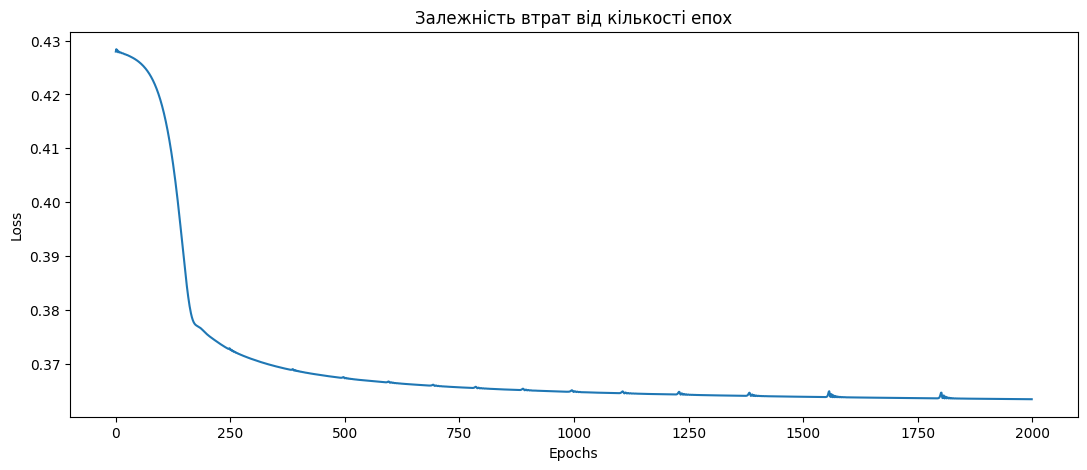

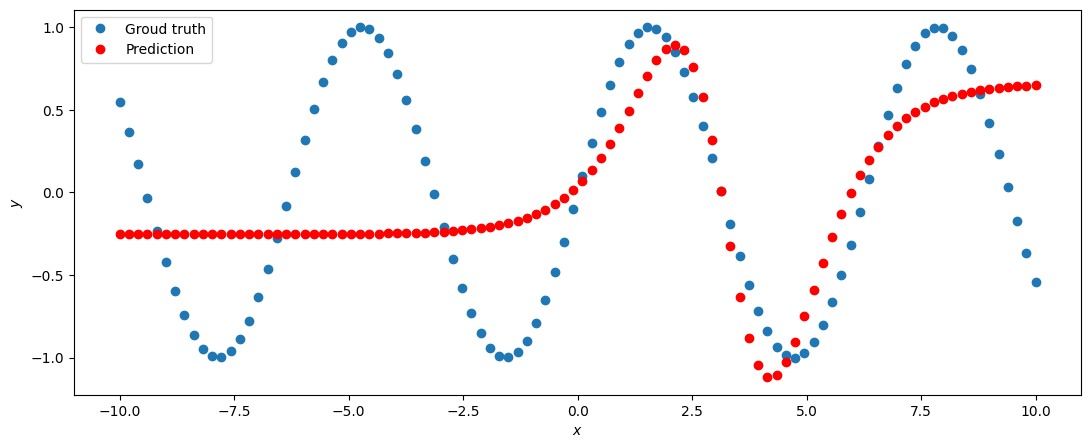

Neurons: 3
Epoch 200, Loss 0.52367103099823
Epoch 400, Loss 0.3045051097869873
Epoch 600, Loss 0.29363489151000977
Epoch 800, Loss 0.24042706191539764
Epoch 1000, Loss 0.23748727142810822
Epoch 1200, Loss 0.23780770599842072
Epoch 1400, Loss 0.23504455387592316
Epoch 1600, Loss 0.23475013673305511
Epoch 1800, Loss 0.23367227613925934
Epoch 2000, Loss 0.23319263756275177


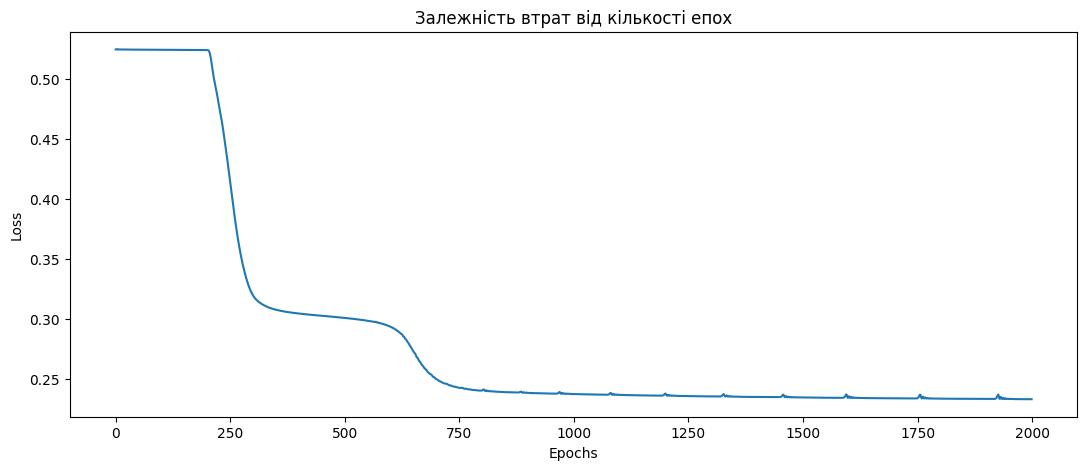

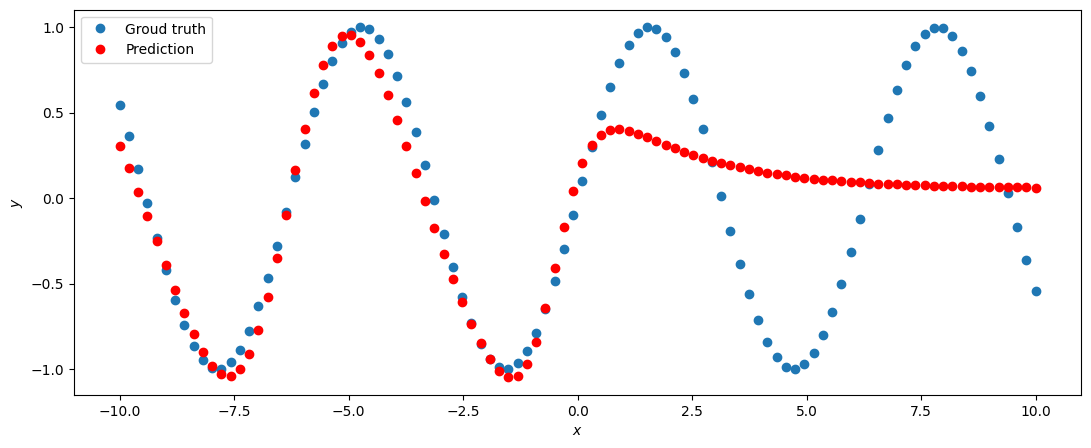

Neurons: 4
Epoch 200, Loss 0.29130423069000244
Epoch 400, Loss 0.28791919350624084
Epoch 600, Loss 0.2863468527793884
Epoch 800, Loss 0.28551045060157776
Epoch 1000, Loss 0.2849510610103607
Epoch 1200, Loss 0.2845897078514099
Epoch 1400, Loss 0.2843354046344757
Epoch 1600, Loss 0.2841854393482208
Epoch 1800, Loss 0.2840574383735657
Epoch 2000, Loss 0.28388604521751404


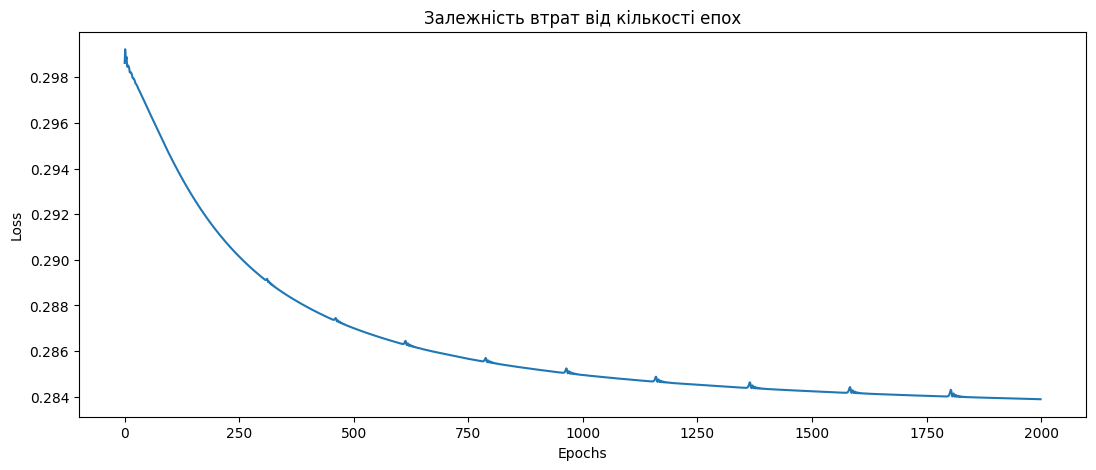

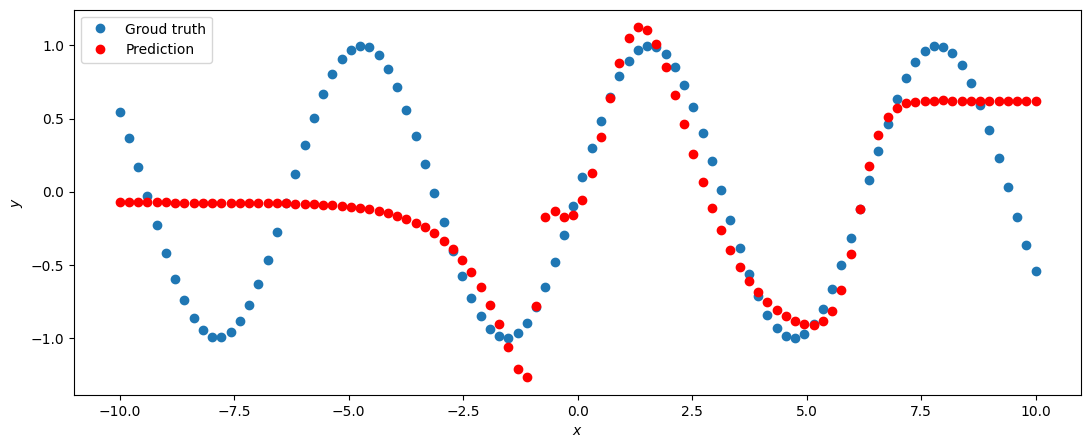

Neurons: 5
Epoch 200, Loss 0.41641154885292053
Epoch 400, Loss 0.41562744975090027
Epoch 600, Loss 0.41520822048187256
Epoch 800, Loss 0.4149981439113617
Epoch 1000, Loss 0.4148921072483063
Epoch 1200, Loss 0.41482293605804443
Epoch 1400, Loss 0.4147721827030182
Epoch 1600, Loss 0.4147309958934784
Epoch 1800, Loss 0.41469651460647583
Epoch 2000, Loss 0.4146672785282135


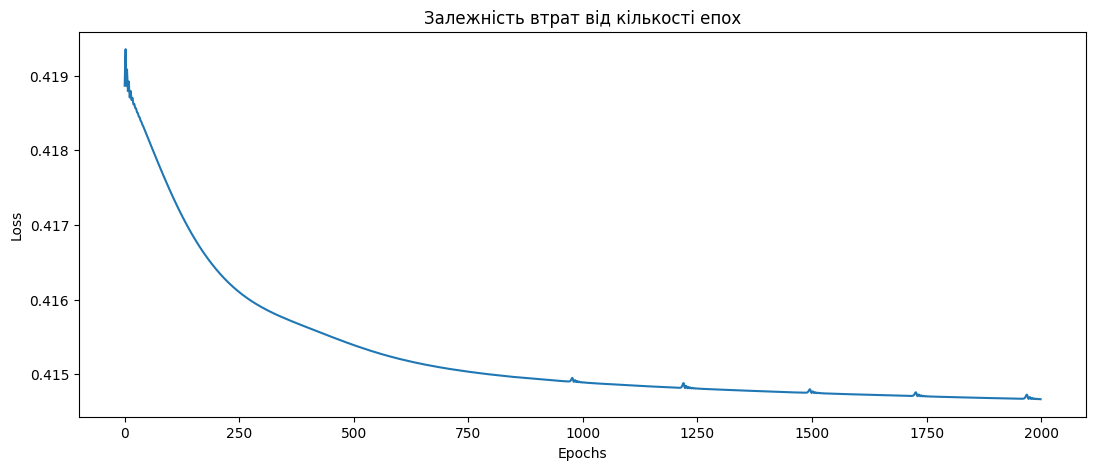

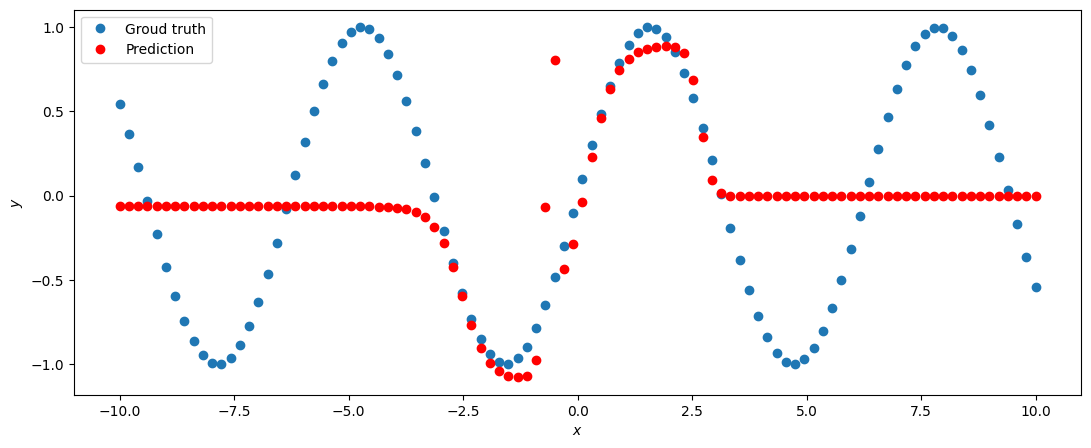

Neurons: 6
Epoch 200, Loss 0.2766658663749695
Epoch 400, Loss 0.2534790635108948
Epoch 600, Loss 0.25323495268821716
Epoch 800, Loss 0.25312113761901855
Epoch 1000, Loss 0.25306394696235657
Epoch 1200, Loss 0.2530020475387573
Epoch 1400, Loss 0.2529655694961548
Epoch 1600, Loss 0.252938836812973
Epoch 1800, Loss 0.2529188394546509
Epoch 2000, Loss 0.2529037594795227


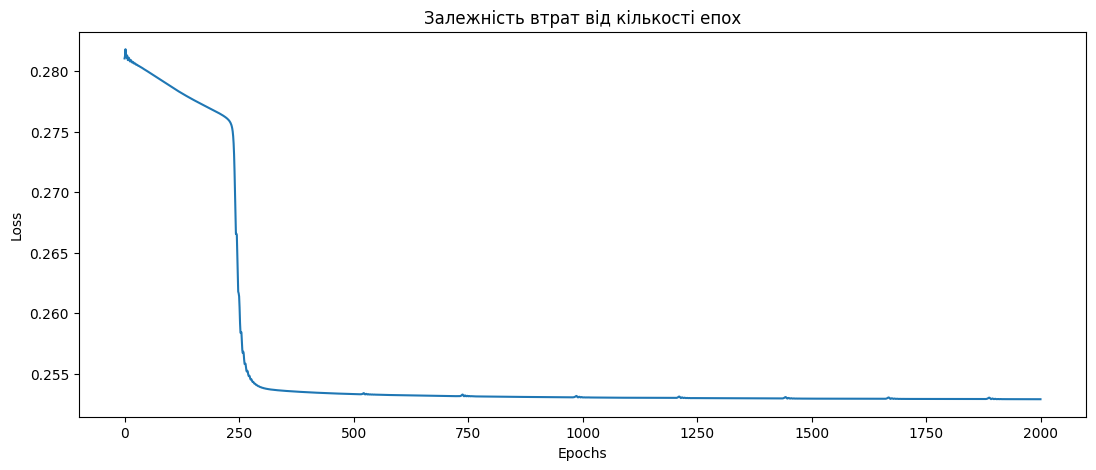

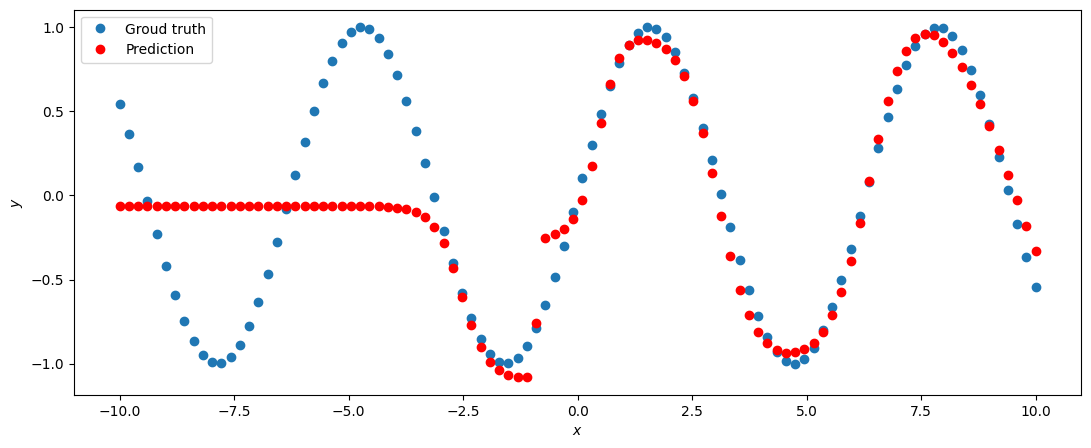

Neurons: 7
Epoch 200, Loss 0.042685460299253464
Epoch 400, Loss 0.0368080660700798
Epoch 600, Loss 0.0358697809278965
Epoch 800, Loss 0.03353661298751831
Epoch 1000, Loss 0.0328485481441021
Epoch 1200, Loss 0.032399214804172516
Epoch 1400, Loss 0.0321015939116478
Epoch 1600, Loss 0.031896982342004776
Epoch 1800, Loss 0.031859979033470154
Epoch 2000, Loss 0.03162527084350586


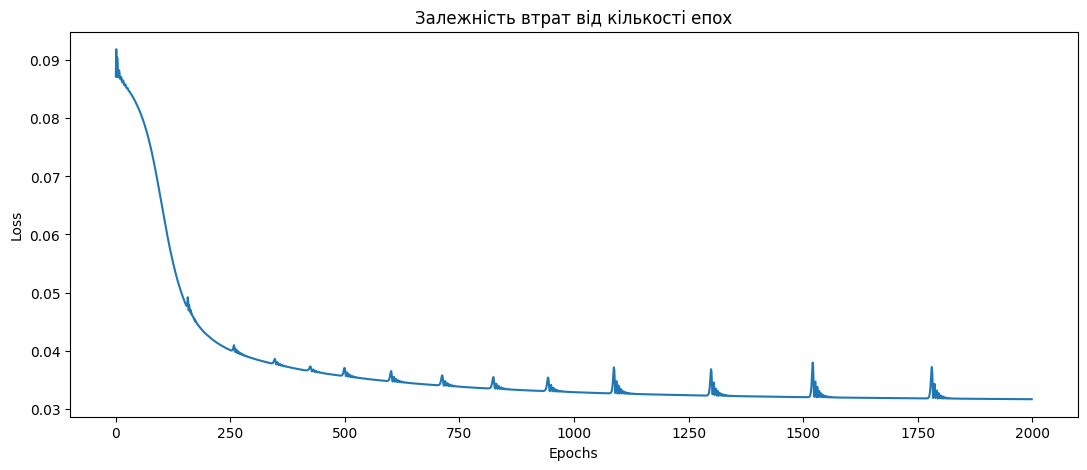

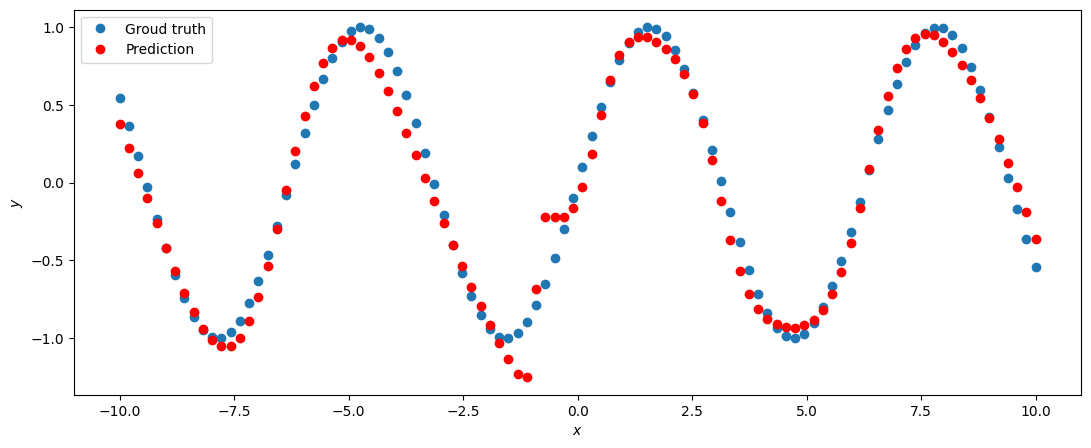

Neurons: 8
Epoch 200, Loss 0.05625326186418533
Epoch 400, Loss 0.031134871765971184
Epoch 600, Loss 0.030461402609944344
Epoch 800, Loss 0.030258307233452797
Epoch 1000, Loss 0.030098211020231247
Epoch 1200, Loss 0.030069230124354362
Epoch 1400, Loss 0.029897019267082214
Epoch 1600, Loss 0.029842421412467957
Epoch 1800, Loss 0.02980106510221958
Epoch 2000, Loss 0.029769614338874817


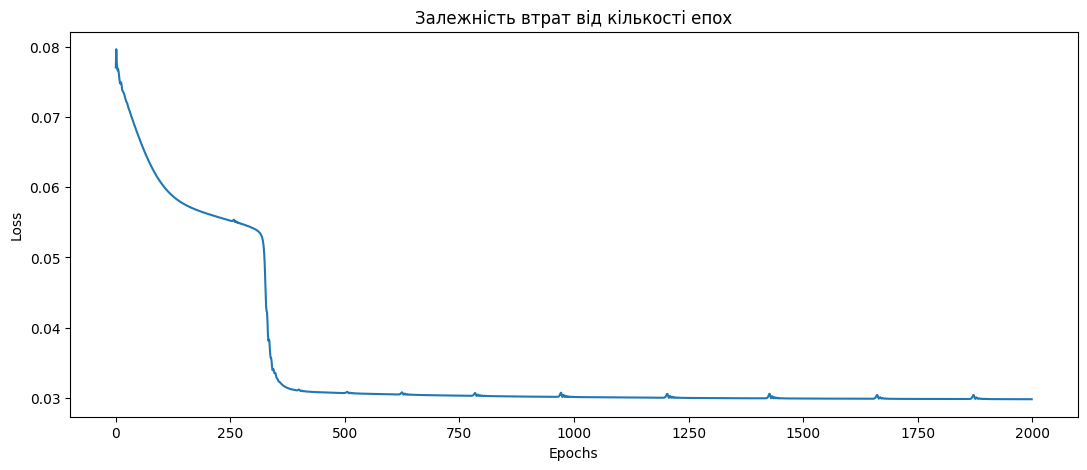

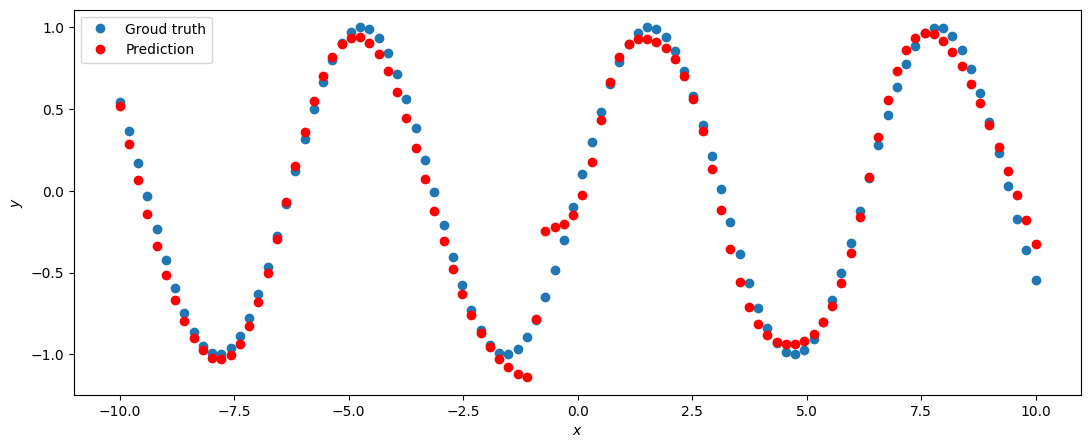

Neurons: 9
Epoch 200, Loss 0.03422444686293602
Epoch 400, Loss 0.030784599483013153
Epoch 600, Loss 0.030426032841205597
Epoch 800, Loss 0.030226383358240128
Epoch 1000, Loss 0.030102841556072235
Epoch 1200, Loss 0.0300197321921587
Epoch 1400, Loss 0.029956601560115814
Epoch 1600, Loss 0.029901396483182907
Epoch 1800, Loss 0.029846683144569397
Epoch 2000, Loss 0.029809489846229553


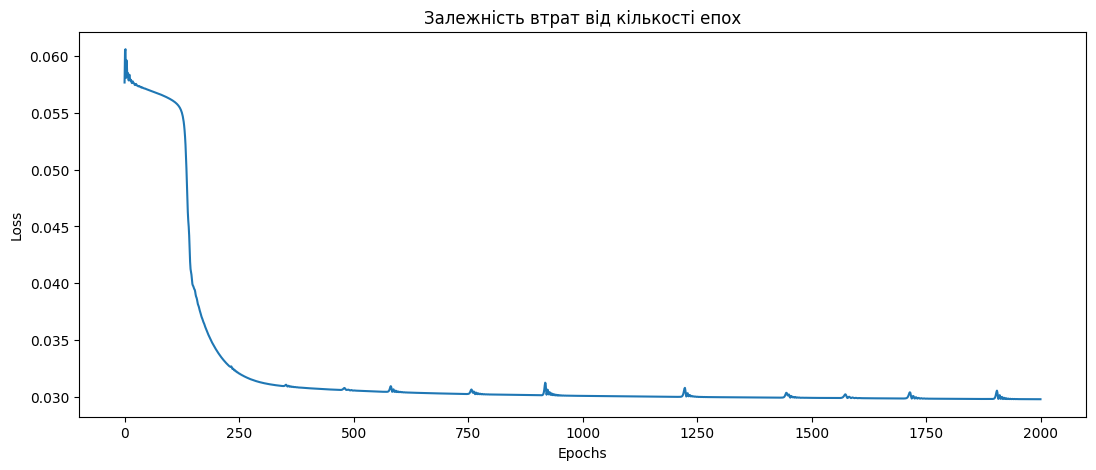

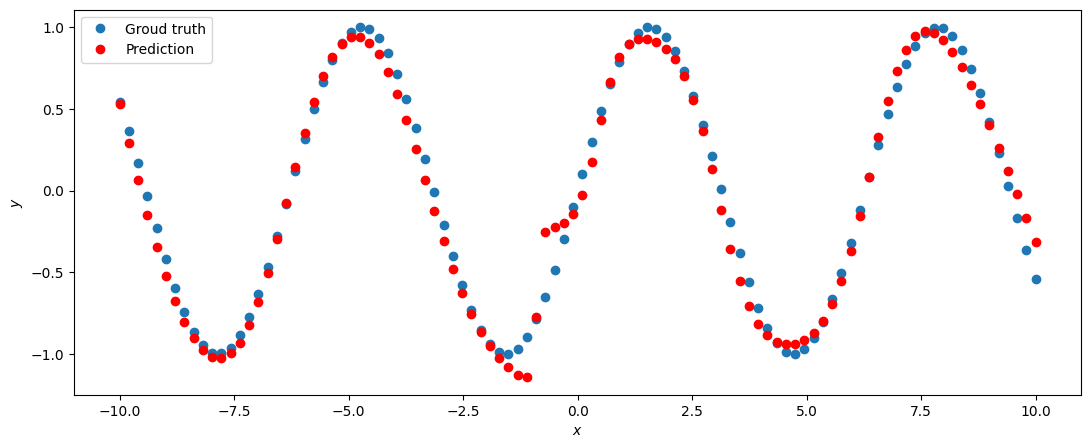

Neurons: 10
Epoch 200, Loss 0.179555743932724
Epoch 400, Loss 0.17529937624931335
Epoch 600, Loss 0.1715259552001953
Epoch 800, Loss 0.16854573786258698
Epoch 1000, Loss 0.16617374122142792
Epoch 1200, Loss 0.16423103213310242
Epoch 1400, Loss 0.16255737841129303
Epoch 1600, Loss 0.1610703468322754
Epoch 1800, Loss 0.15978269279003143
Epoch 2000, Loss 0.15870660543441772


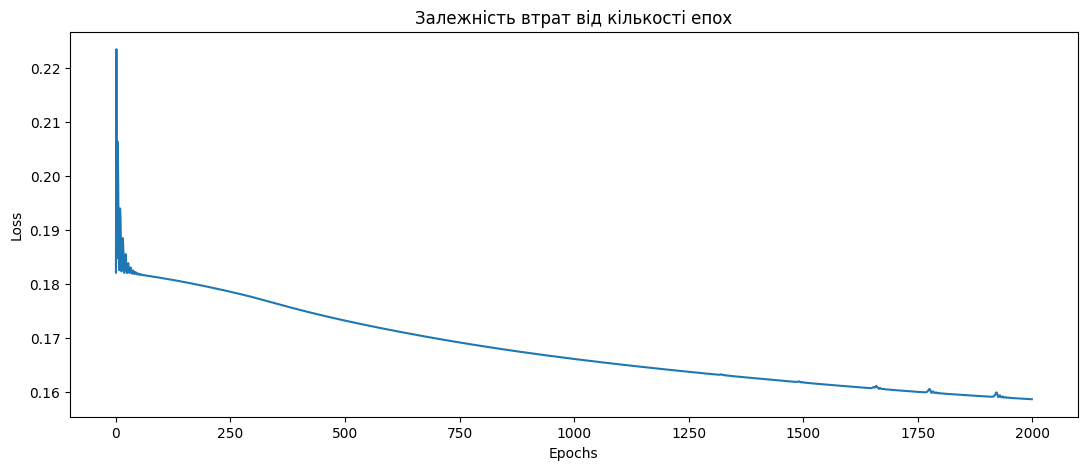

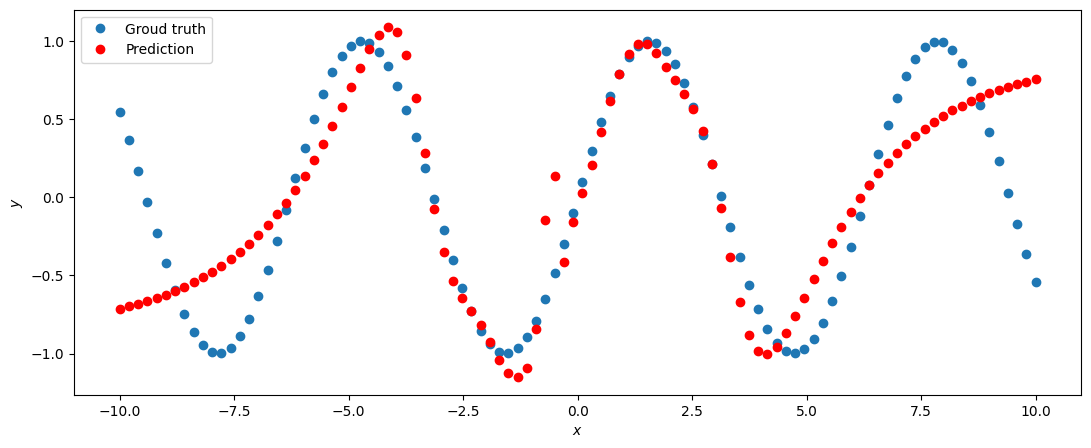

In [172]:
for net in nets_tanh_1_hidden:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 2000)
    plt.show()

Зменшимо кількість епох (будемо використовувати тільки мережі з 7-10 нейронами)

Результат не покращився

Neurons: 7
Epoch 50, Loss 0.031840577721595764
Epoch 100, Loss 0.03161214664578438
Epoch 150, Loss 0.03160405158996582
Epoch 200, Loss 0.03159591555595398
Epoch 250, Loss 0.031587596982717514
Epoch 300, Loss 0.03157903999090195
Epoch 350, Loss 0.031570304185152054
Epoch 400, Loss 0.03156139701604843
Epoch 450, Loss 0.03155234456062317
Epoch 500, Loss 0.03154320642352104


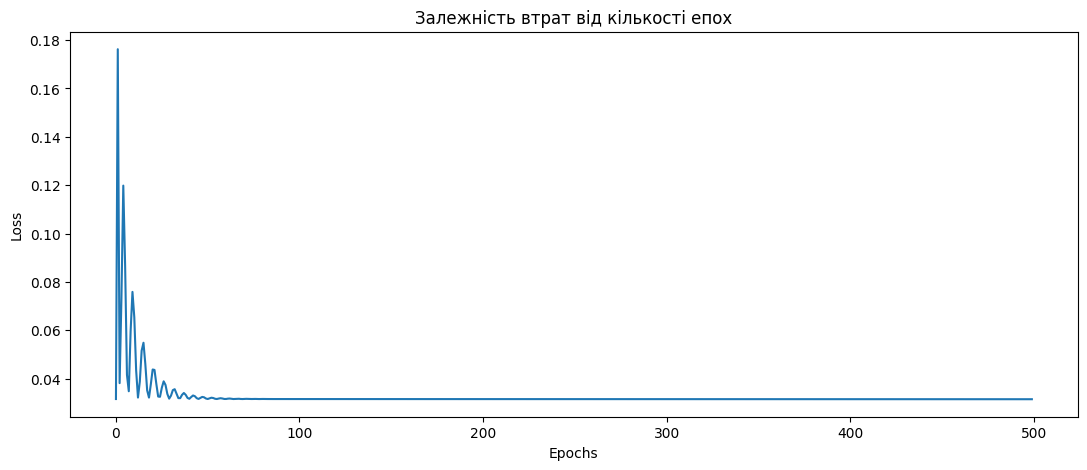

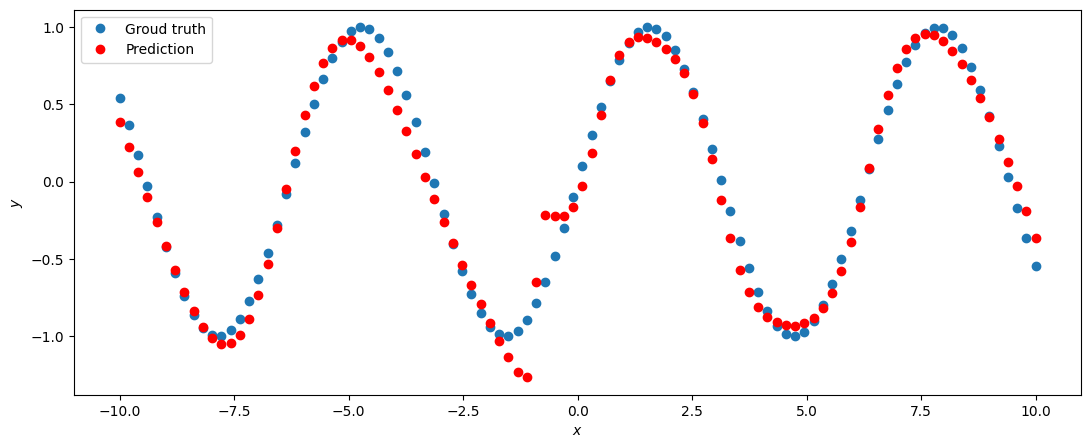

Neurons: 8
Epoch 50, Loss 0.029791003093123436
Epoch 100, Loss 0.02974996343255043
Epoch 150, Loss 0.02974155731499195
Epoch 200, Loss 0.029734084382653236
Epoch 250, Loss 0.02972741611301899
Epoch 300, Loss 0.029721446335315704
Epoch 350, Loss 0.02971608377993107
Epoch 400, Loss 0.029711220413446426
Epoch 450, Loss 0.029706787317991257
Epoch 500, Loss 0.029702739790081978


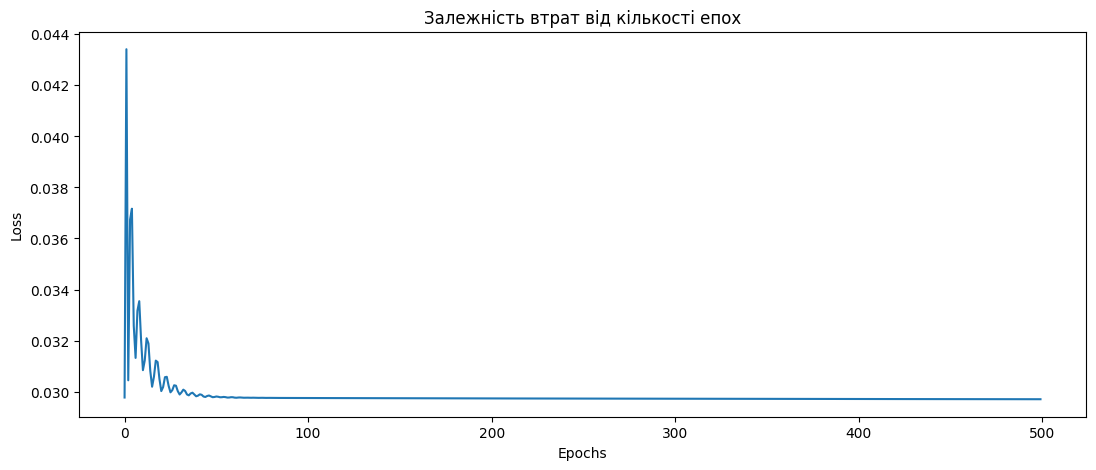

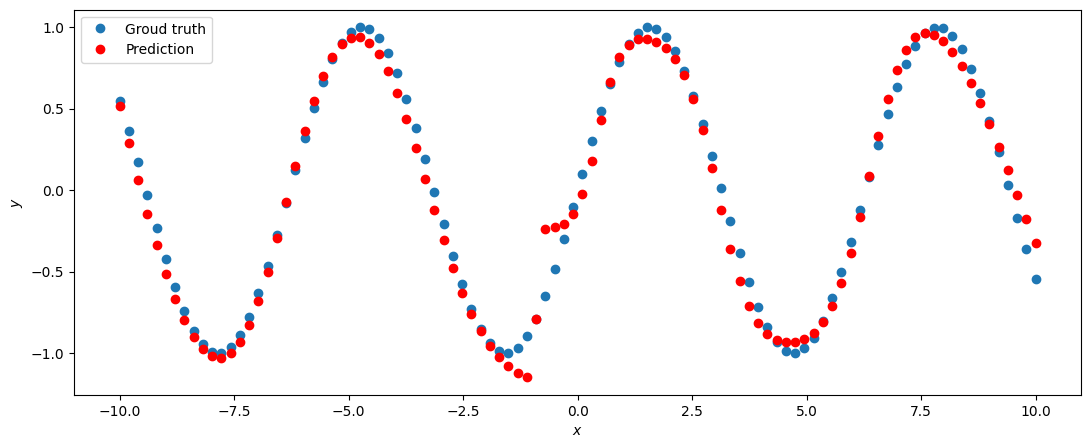

Neurons: 9
Epoch 50, Loss 0.0299209114164114
Epoch 100, Loss 0.029791925102472305
Epoch 150, Loss 0.029782548546791077
Epoch 200, Loss 0.02977406419813633
Epoch 250, Loss 0.029766473919153214
Epoch 300, Loss 0.0297597236931324
Epoch 350, Loss 0.02975366823375225
Epoch 400, Loss 0.02974821627140045
Epoch 450, Loss 0.02974330447614193
Epoch 500, Loss 0.029738806188106537


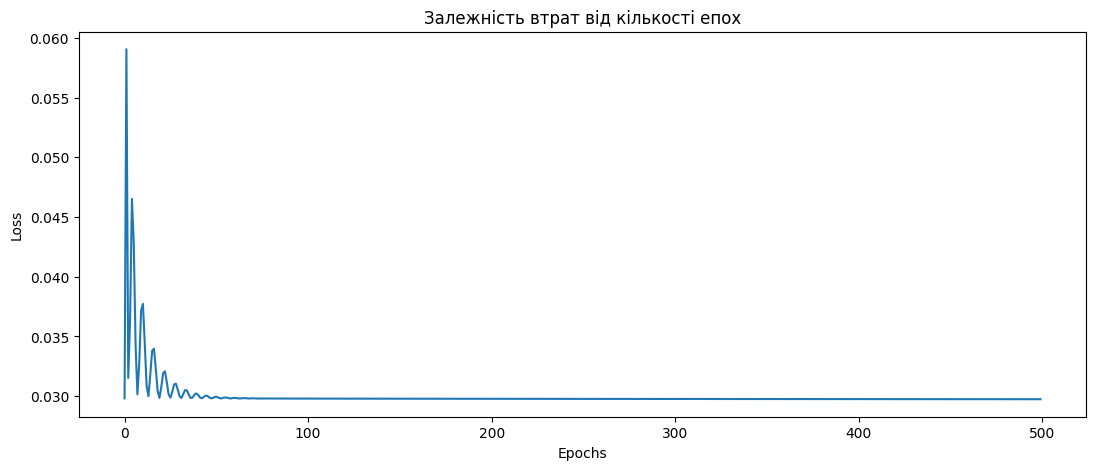

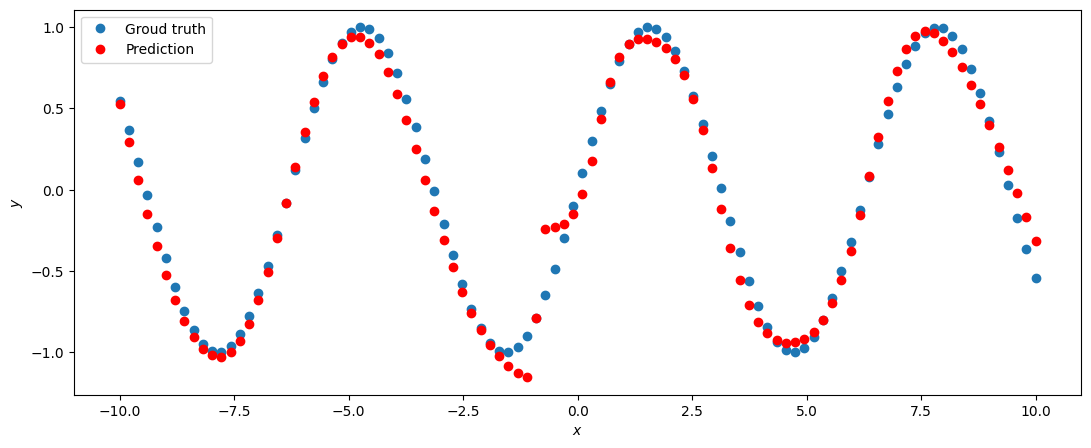

Neurons: 10
Epoch 50, Loss 0.15875355899333954
Epoch 100, Loss 0.15861499309539795
Epoch 150, Loss 0.15857091546058655
Epoch 200, Loss 0.15851929783821106
Epoch 250, Loss 0.15846094489097595
Epoch 300, Loss 0.15839649736881256
Epoch 350, Loss 0.15832647681236267
Epoch 400, Loss 0.1582515686750412
Epoch 450, Loss 0.15817204117774963
Epoch 500, Loss 0.15808811783790588


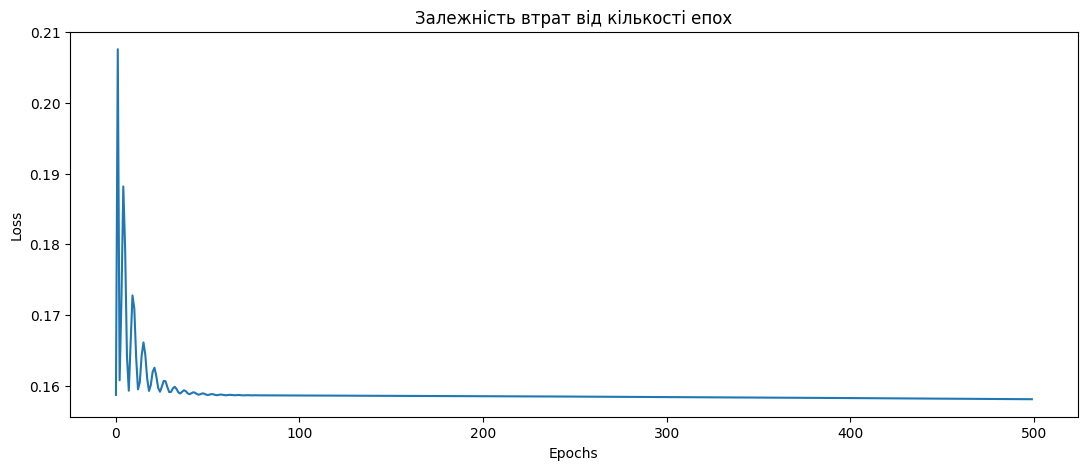

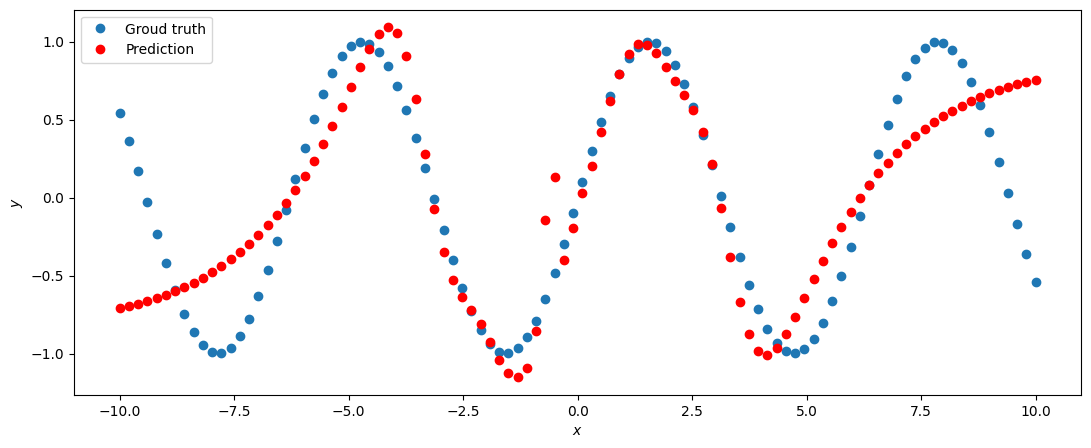

In [173]:
for net in nets_tanh_1_hidden[-4:]:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 500)
    plt.show()

Змінимо функцію активації на ReLU

SineNet(
  (fc1): Linear(in_features=1, out_features=7, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=7, out_features=1, bias=True)
)

SineNet(
  (fc1): Linear(in_features=1, out_features=8, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)
...
SineNet(
  (fc1): Linear(in_features=1, out_features=9, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=9, out_features=1, bias=True)
)

SineNet(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (act1): Sigmoid()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


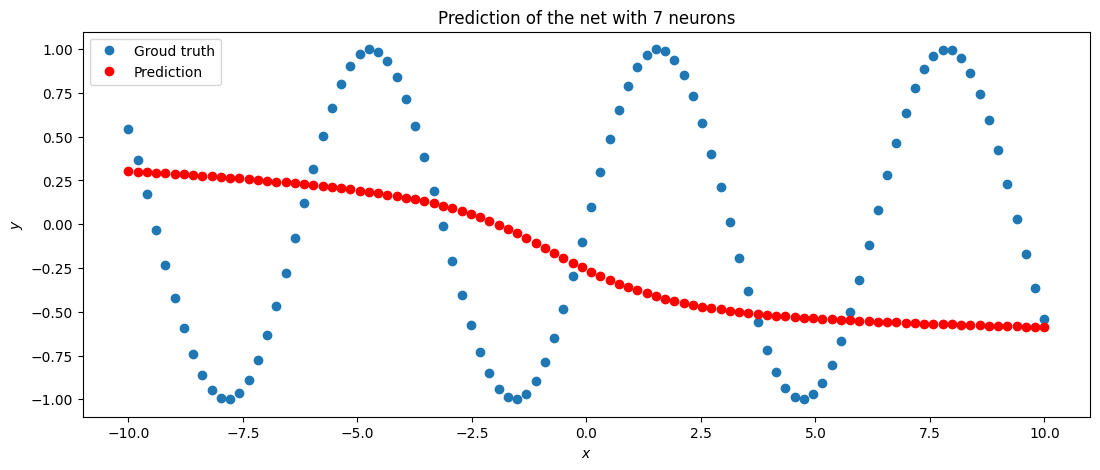

In [174]:
nets_relu_1_hidden = [SineNet(n_neurons, activate=torch.nn.Sigmoid()) for n_neurons in range(7, 11)]
print(*nets_relu_1_hidden[:2], sep='\n\n')
print('...')
print(*nets_relu_1_hidden[-2:], sep='\n\n')

predict(nets_relu_1_hidden[0], x_validation, y_validation)
plt.title(f'Prediction of the net with {nets_relu_1_hidden[0].fc1.out_features} neurons')
plt.show()

Навчаємо

Бачимо гірші результати, не вистачає нейронів

Neurons: 7
Epoch 100, Loss 0.5242845416069031
Epoch 200, Loss 0.4889066219329834
Epoch 300, Loss 0.41959887742996216
Epoch 400, Loss 0.33390915393829346
Epoch 500, Loss 0.23845890164375305
Epoch 600, Loss 0.15738613903522491
Epoch 700, Loss 0.11499987542629242
Epoch 800, Loss 0.085753433406353
Epoch 900, Loss 0.06998588889837265
Epoch 1000, Loss 0.06319861859083176


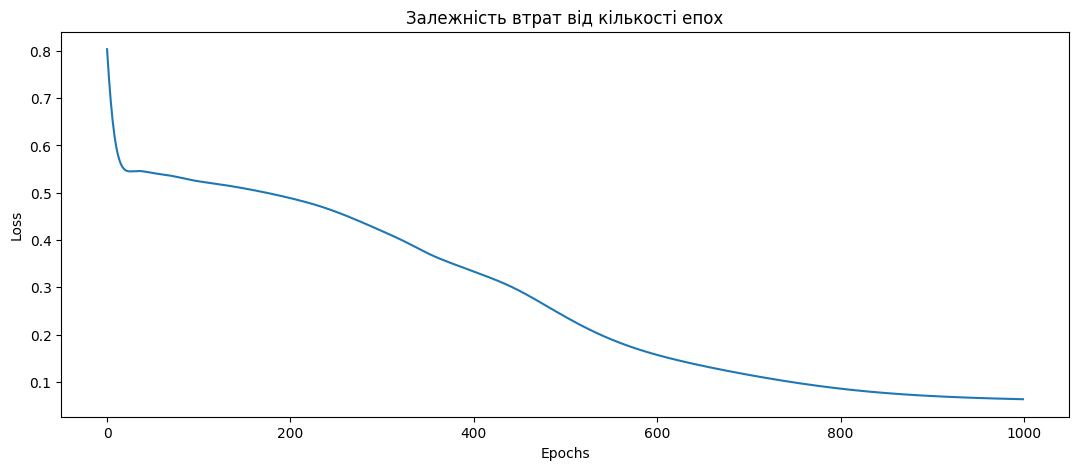

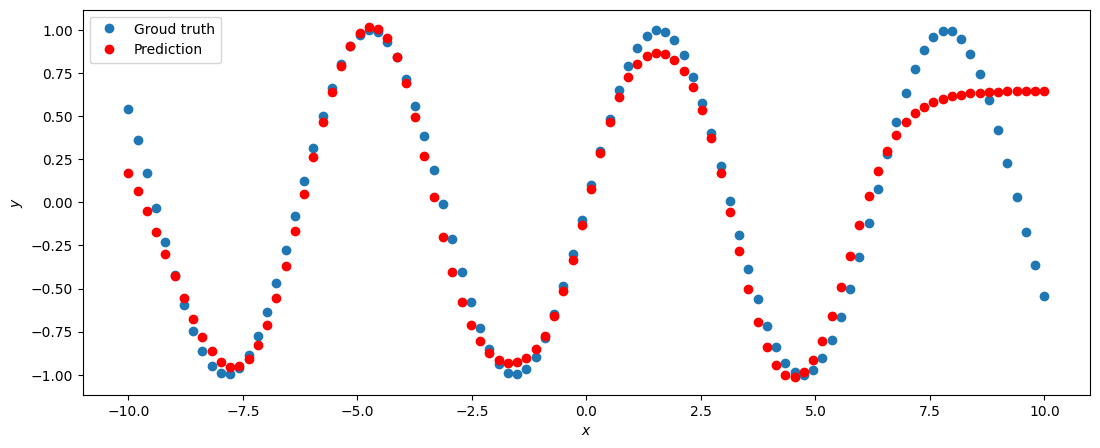

Neurons: 8
Epoch 100, Loss 0.5262713432312012
Epoch 200, Loss 0.504631519317627
Epoch 300, Loss 0.4720793068408966
Epoch 400, Loss 0.43834641575813293
Epoch 500, Loss 0.3879988491535187
Epoch 600, Loss 0.3405449688434601
Epoch 700, Loss 0.3195996582508087
Epoch 800, Loss 0.3117670714855194
Epoch 900, Loss 0.3080179691314697
Epoch 1000, Loss 0.30526772141456604


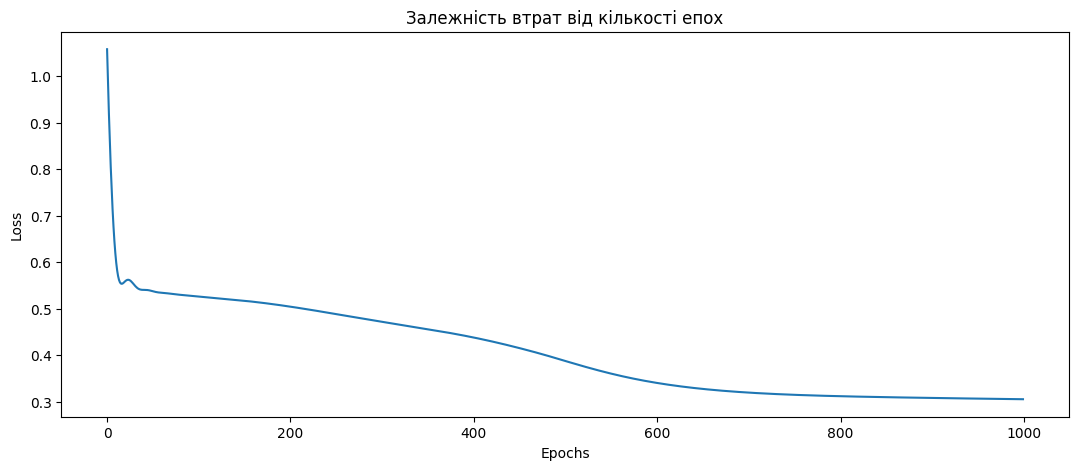

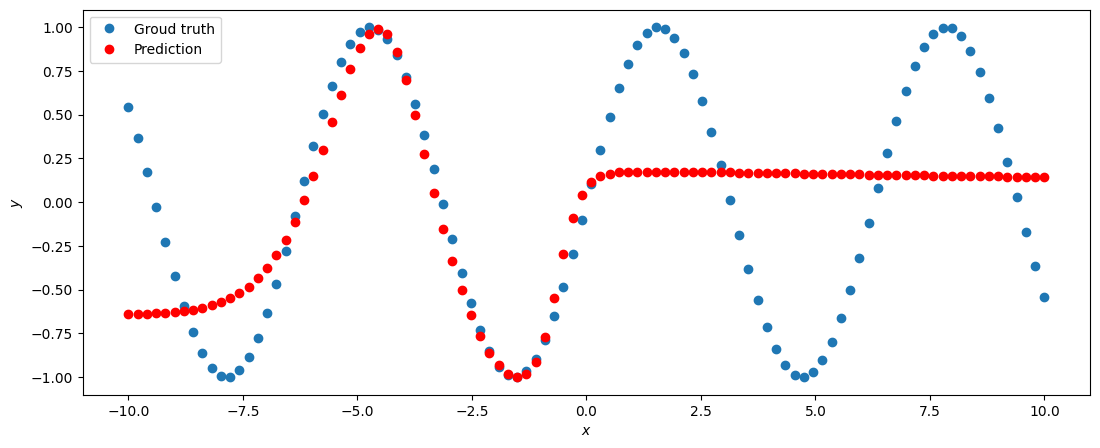

Neurons: 9
Epoch 100, Loss 0.5335786938667297
Epoch 200, Loss 0.5134066939353943
Epoch 300, Loss 0.47762420773506165
Epoch 400, Loss 0.42739954590797424
Epoch 500, Loss 0.36228206753730774
Epoch 600, Loss 0.3252609968185425
Epoch 700, Loss 0.3120861053466797
Epoch 800, Loss 0.3074120283126831
Epoch 900, Loss 0.30521470308303833
Epoch 1000, Loss 0.3036513030529022


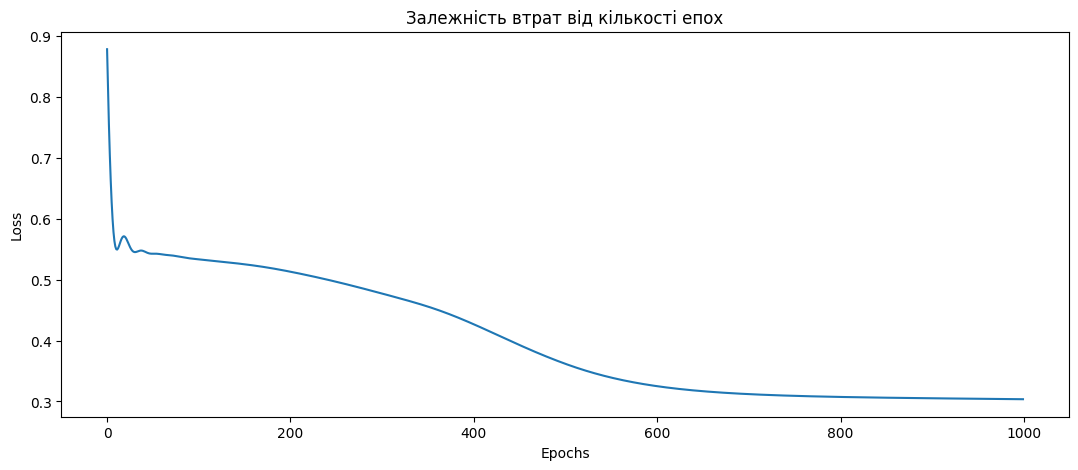

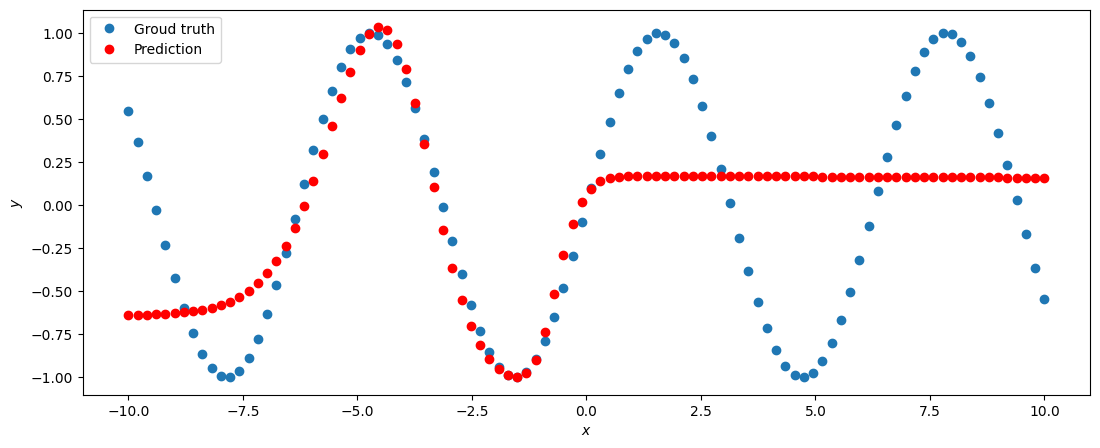

Neurons: 10
Epoch 100, Loss 0.5183490514755249
Epoch 200, Loss 0.4462675452232361
Epoch 300, Loss 0.25869232416152954
Epoch 400, Loss 0.1565808355808258
Epoch 500, Loss 0.1330171823501587
Epoch 600, Loss 0.1270691454410553
Epoch 700, Loss 0.12390286475419998
Epoch 800, Loss 0.12140380591154099
Epoch 900, Loss 0.1191825121641159
Epoch 1000, Loss 0.11021439731121063


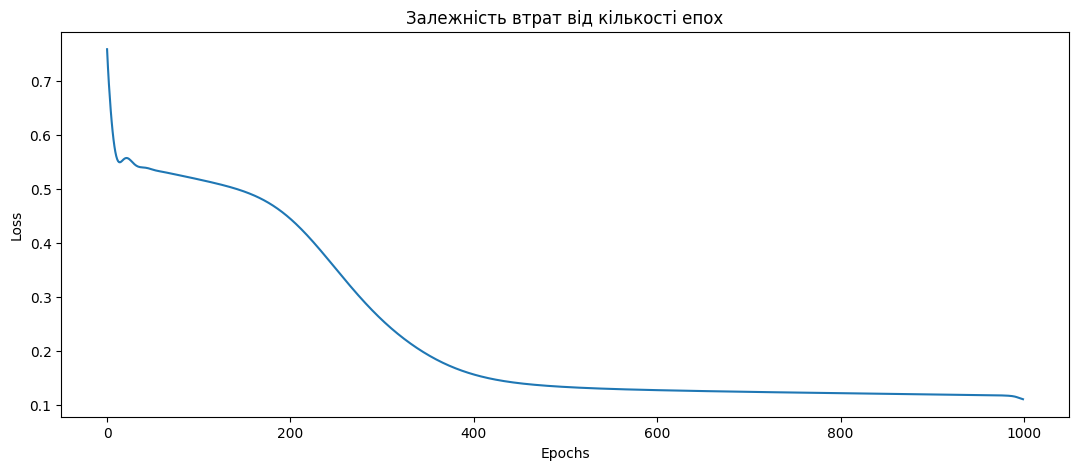

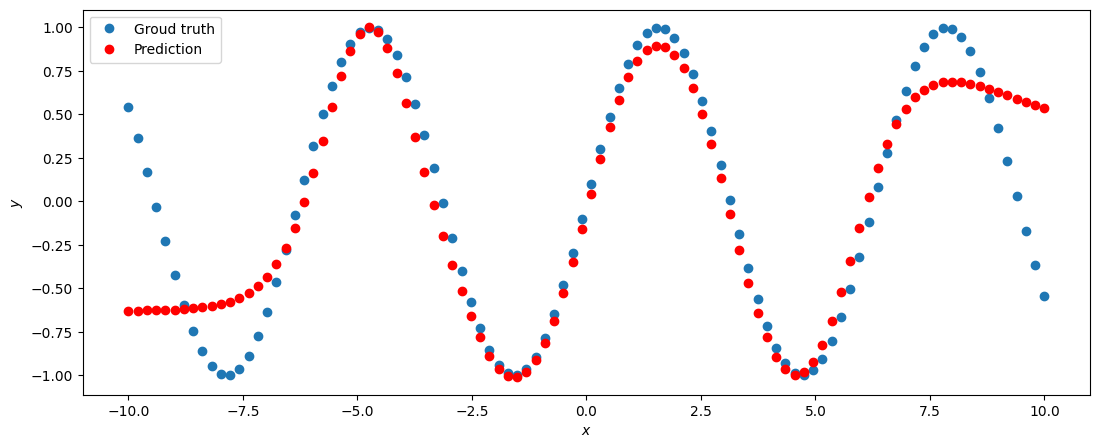

In [175]:
for net in nets_relu_1_hidden:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 1000)
    plt.show()

Додамо шари (1 -> 8 -> 16 -> 8 -> 1) з функцією активації tanh

SineNet(
  (fc1): Linear(in_features=1, out_features=7, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=7, out_features=14, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=14, out_features=7, bias=True)
  (act3): Tanh()
  (fc4): Linear(in_features=7, out_features=1, bias=True)
)

SineNet(
  (fc1): Linear(in_features=1, out_features=8, bias=True)
  (act1): Tanh()
  (fc2): Linear(in_features=8, out_features=16, bias=True)
  (act2): Tanh()
  (fc3): Linear(in_features=16, out_features=8, bias=True)
  (act3): Tanh()
  (fc4): Linear(in_features=8, out_features=1, bias=True)
)


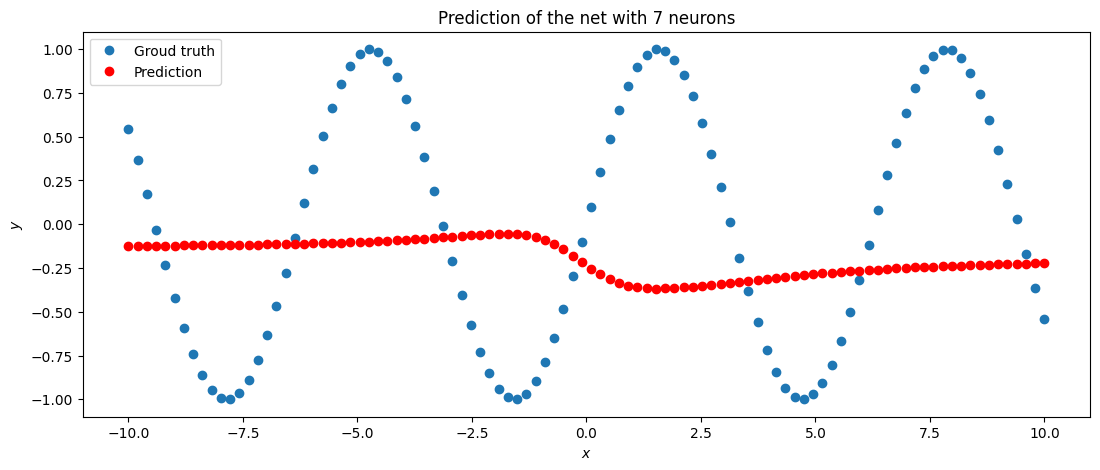

In [176]:
class SineNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, activate=torch.nn.Tanh()):
        super(SineNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, n_hidden_neurons)
        # Функція активації
        self.act1 = activate
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons * 2)
        self.act2 = activate
        self.fc3 = torch.nn.Linear(n_hidden_neurons * 2, n_hidden_neurons)
        self.act3 = activate
        self.fc4 = torch.nn.Linear(n_hidden_neurons, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        x = self.fc4(x)
        return x

nets_tanh_2_hidden = [SineNet(n_neurons) for n_neurons in range(7, 11)]
print(*nets_tanh_2_hidden[:2], sep='\n\n')

predict(nets_tanh_2_hidden[0], x_validation, y_validation)
plt.title(f'Prediction of the net with {nets_tanh_2_hidden[0].fc1.out_features} neurons')
plt.show()

Тепер навчаємо. Можемо побачити, що результат став значно кращим для кожного варіанту

Neurons: 7
Epoch 100, Loss 0.21820546686649323
Epoch 200, Loss 0.12888795137405396
Epoch 300, Loss 0.046093497425317764
Epoch 400, Loss 0.037459470331668854
Epoch 500, Loss 0.03446820378303528
Epoch 600, Loss 0.0338735431432724
Epoch 700, Loss 0.033647652715444565
Epoch 800, Loss 0.03352205827832222
Epoch 900, Loss 0.03330977261066437
Epoch 1000, Loss 0.03321373462677002


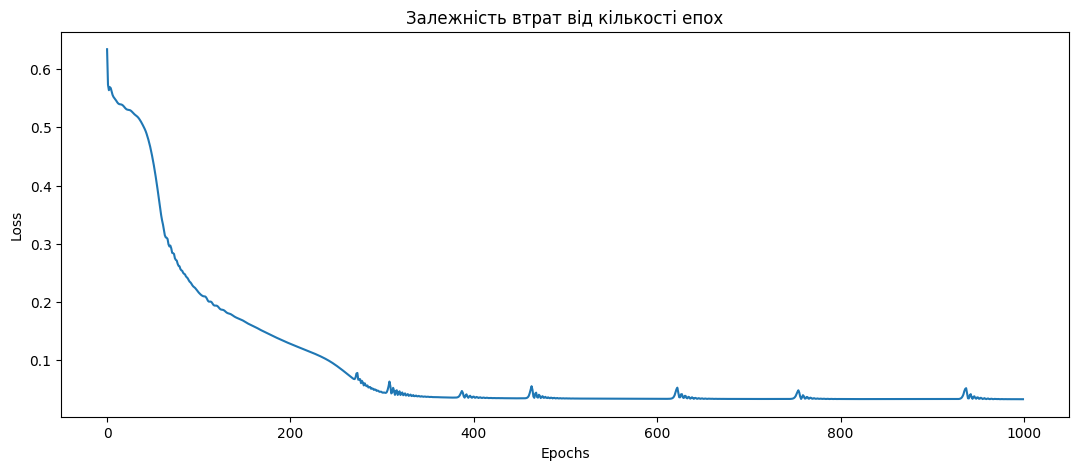

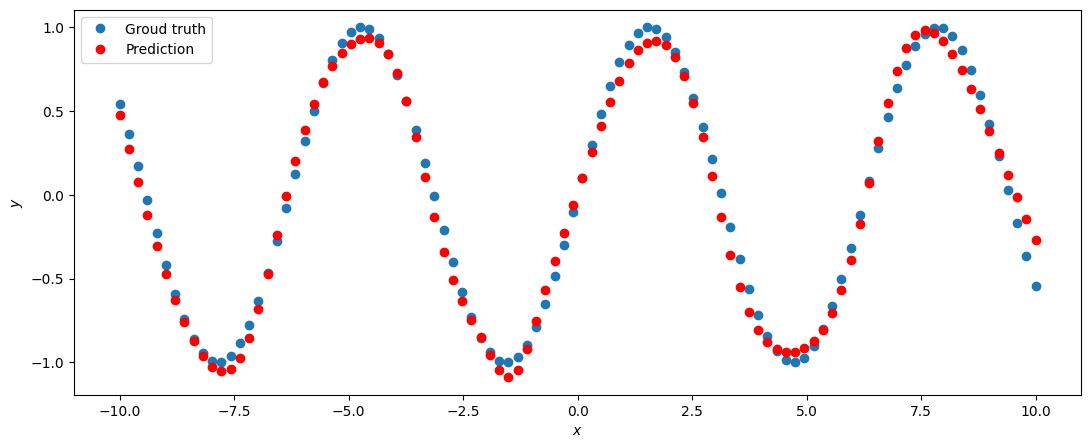

Neurons: 8
Epoch 100, Loss 0.19073286652565002
Epoch 200, Loss 0.13293403387069702
Epoch 300, Loss 0.07806993275880814
Epoch 400, Loss 0.06285760551691055
Epoch 500, Loss 0.05682617053389549
Epoch 600, Loss 0.05318345129489899
Epoch 700, Loss 0.04352491721510887
Epoch 800, Loss 0.042182501405477524
Epoch 900, Loss 0.05102422833442688
Epoch 1000, Loss 0.038217443972826004


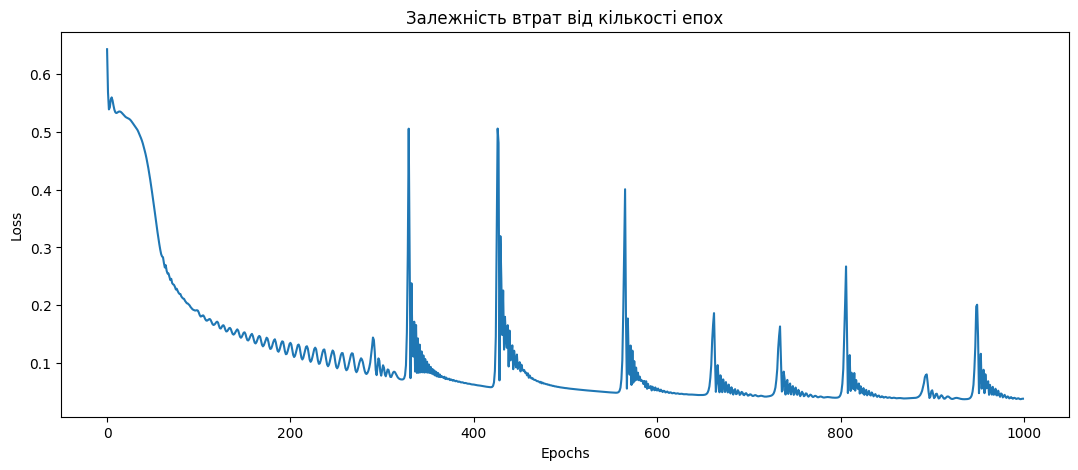

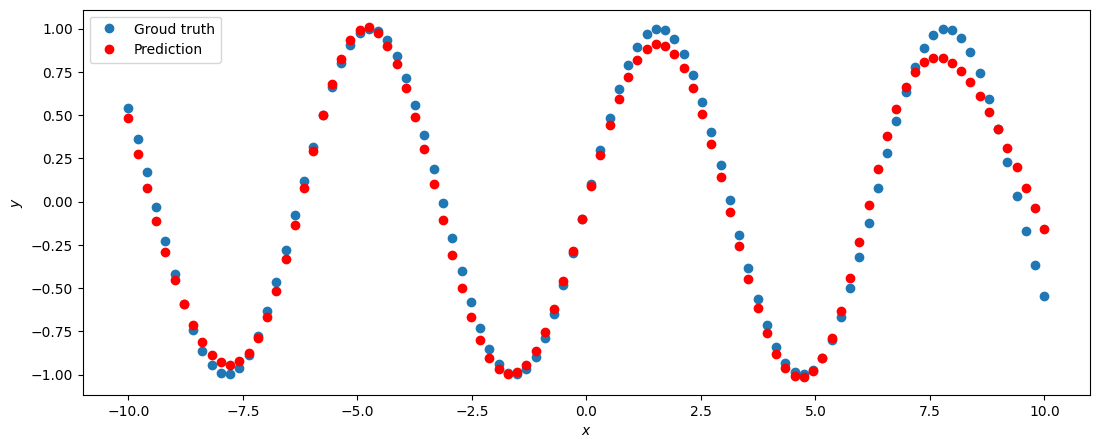

Neurons: 9
Epoch 100, Loss 0.20353949069976807
Epoch 200, Loss 0.18725423514842987
Epoch 300, Loss 0.1469176560640335
Epoch 400, Loss 0.04374619573354721
Epoch 500, Loss 0.03403080627322197
Epoch 600, Loss 0.03316642343997955
Epoch 700, Loss 0.0325172133743763
Epoch 800, Loss 0.03195170685648918
Epoch 900, Loss 0.03156832233071327
Epoch 1000, Loss 0.031116671860218048


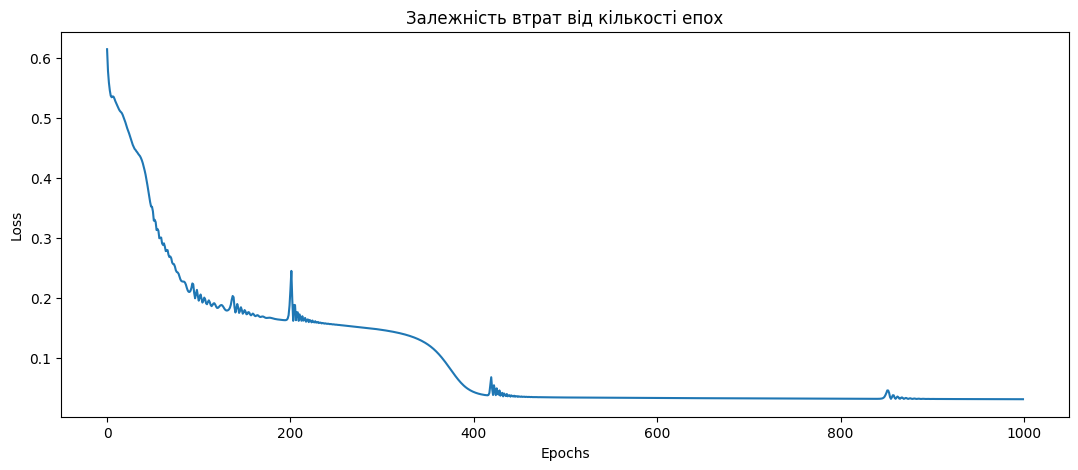

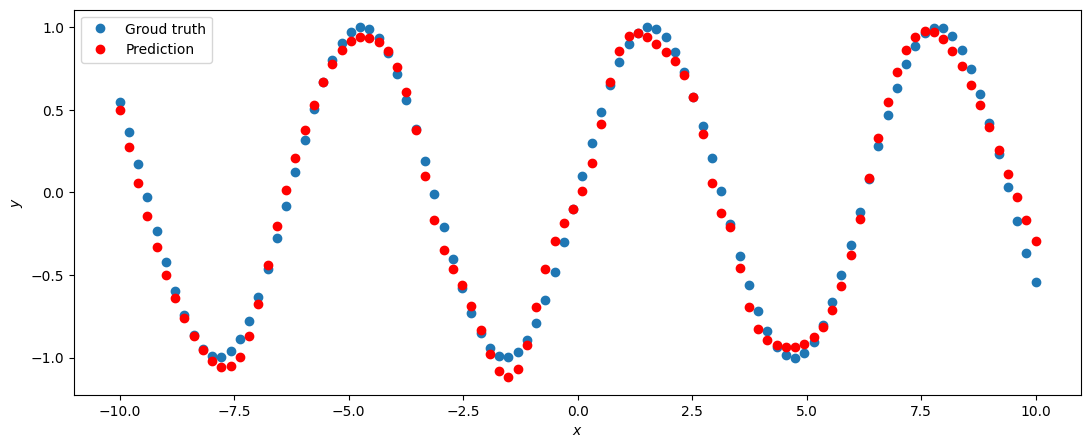

Neurons: 10
Epoch 100, Loss 0.225947305560112
Epoch 200, Loss 0.1572464108467102
Epoch 300, Loss 0.1199401319026947
Epoch 400, Loss 0.03765272721648216
Epoch 500, Loss 0.032589685171842575
Epoch 600, Loss 0.03194737434387207
Epoch 700, Loss 0.03153730183839798
Epoch 800, Loss 0.031247707083821297
Epoch 900, Loss 0.030875446274876595
Epoch 1000, Loss 0.030585836619138718


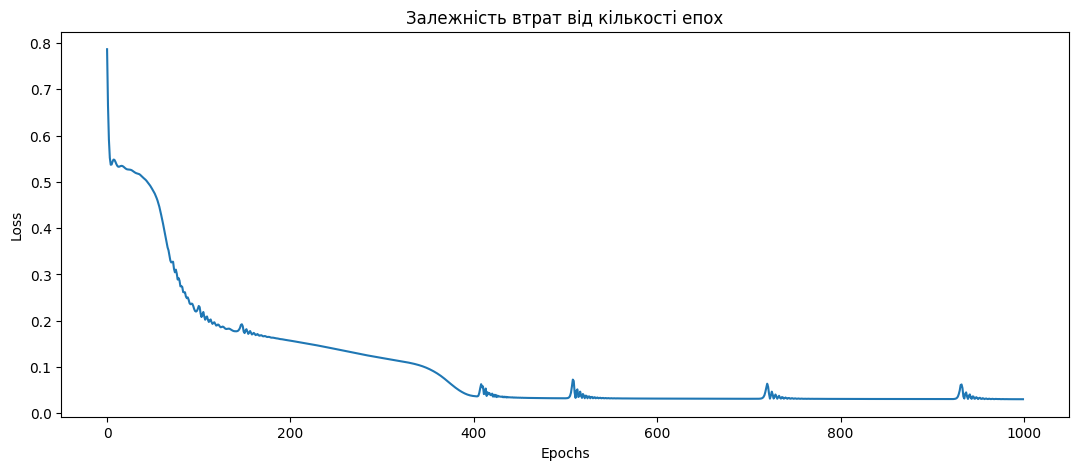

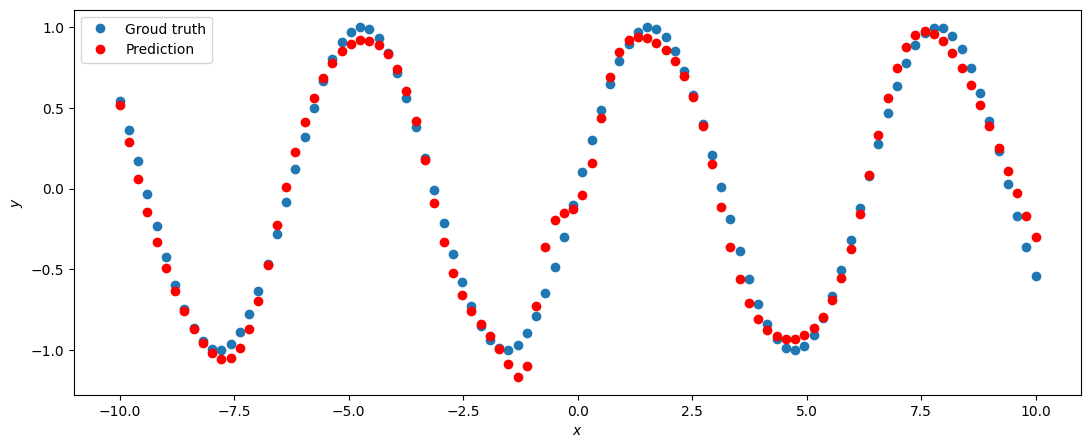

In [177]:
for net in nets_tanh_2_hidden:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 1000)
    plt.show()

Змінимо функцію втрат на абсолютну помилку замість квадратичної

Результати стали гірші

In [178]:
def loss(pred, target):
    absolute_diff = torch.abs(pred - target)  # Абсолютна помилка замість квадратичної
    return absolute_diff.mean()

In [179]:
def train(net, x_train, y_train, epochs):
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    loss_values = []
    for i in range(epochs):
        optimizer.zero_grad()
        y_pred = net.forward(x_train)
        loss_val = loss(y_pred, y_train)
        loss_val.backward()
        optimizer.step()
        loss_values.append(loss_val.item())
        if (i+1) % (epochs / 10) == 0:
            print(f'Epoch {i+1}, Loss {loss_val.item()}')

    plt.plot(range(epochs), loss_values)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Залежність втрат від кількості епох')
    plt.show()
    
    predict(net, x_validation, y_validation)

Neurons: 7
Epoch 100, Loss 0.1475358009338379
Epoch 200, Loss 0.15193204581737518
Epoch 300, Loss 0.14477647840976715
Epoch 400, Loss 0.14277984201908112
Epoch 500, Loss 0.1423816978931427
Epoch 600, Loss 0.14494414627552032
Epoch 700, Loss 0.14803093671798706
Epoch 800, Loss 0.13999348878860474
Epoch 900, Loss 0.13994207978248596
Epoch 1000, Loss 0.14421148598194122


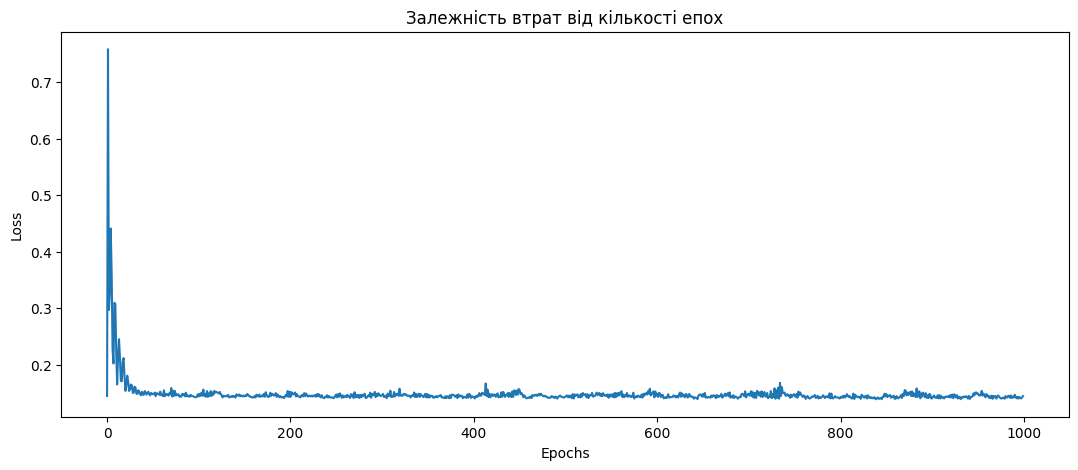

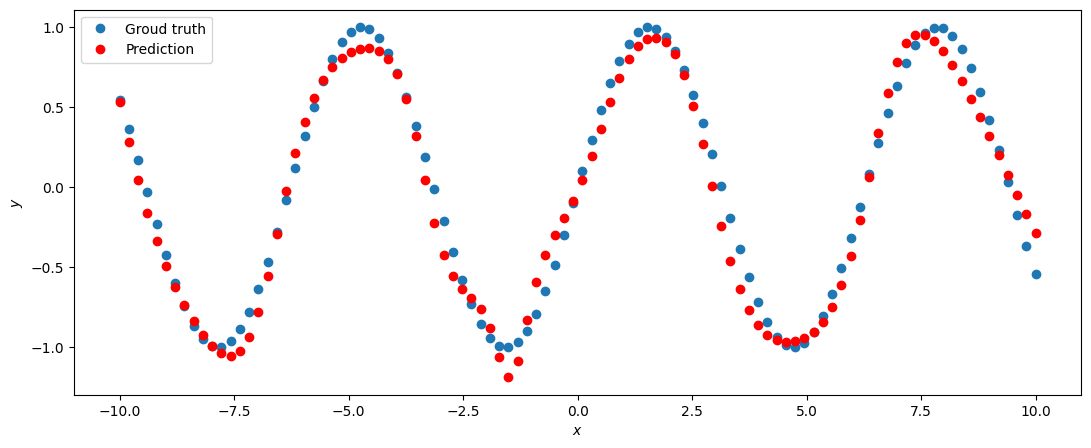

Neurons: 8
Epoch 100, Loss 0.15846985578536987
Epoch 200, Loss 0.21563184261322021
Epoch 300, Loss 0.17140617966651917
Epoch 400, Loss 0.15363869071006775
Epoch 500, Loss 0.15260052680969238
Epoch 600, Loss 0.15091590583324432
Epoch 700, Loss 0.14917464554309845
Epoch 800, Loss 0.1621423214673996
Epoch 900, Loss 0.14756399393081665
Epoch 1000, Loss 0.1679656058549881


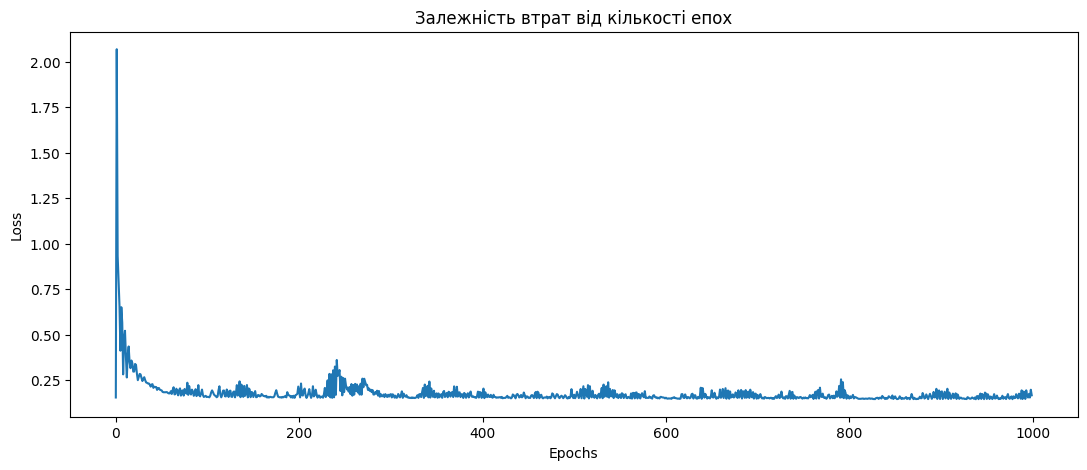

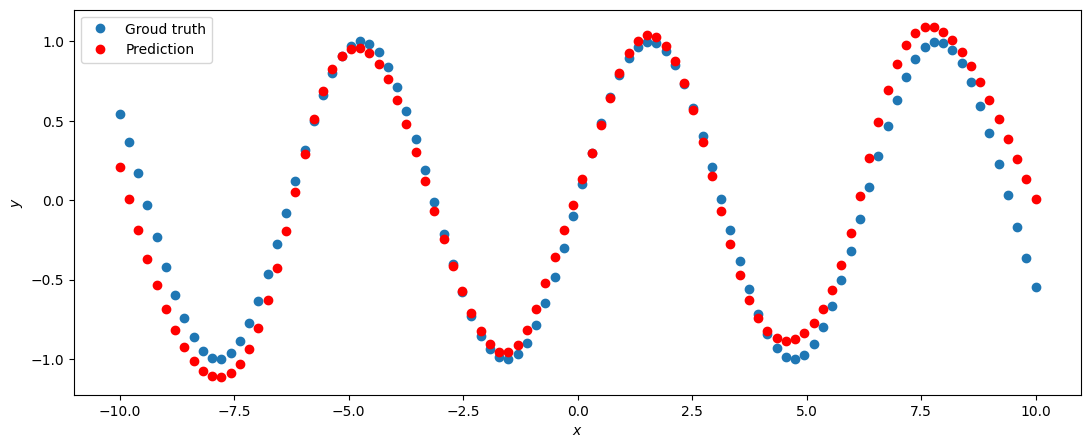

Neurons: 9
Epoch 100, Loss 0.1404038965702057
Epoch 200, Loss 0.1374169886112213
Epoch 300, Loss 0.13315856456756592
Epoch 400, Loss 0.14231128990650177
Epoch 500, Loss 0.13872916996479034
Epoch 600, Loss 0.14463232457637787
Epoch 700, Loss 0.1326247602701187
Epoch 800, Loss 0.1368771195411682
Epoch 900, Loss 0.14036637544631958
Epoch 1000, Loss 0.1310742199420929


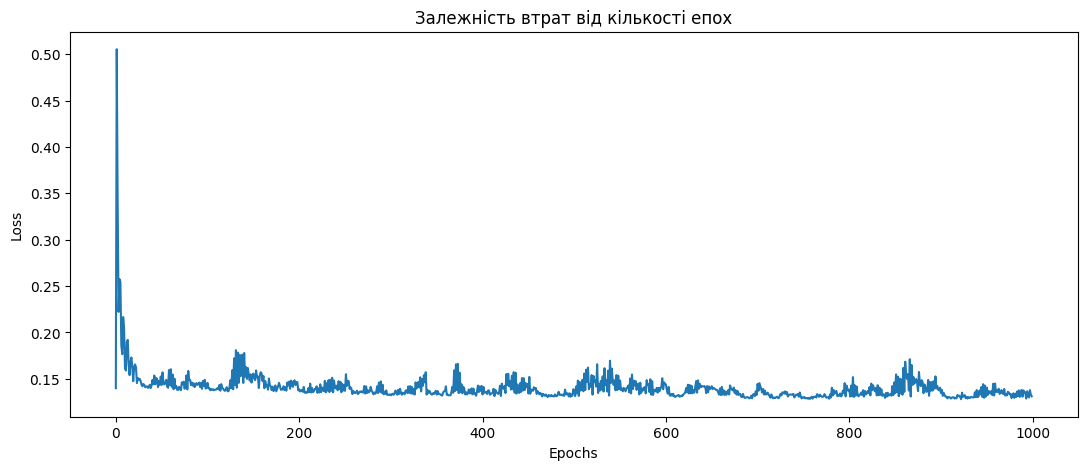

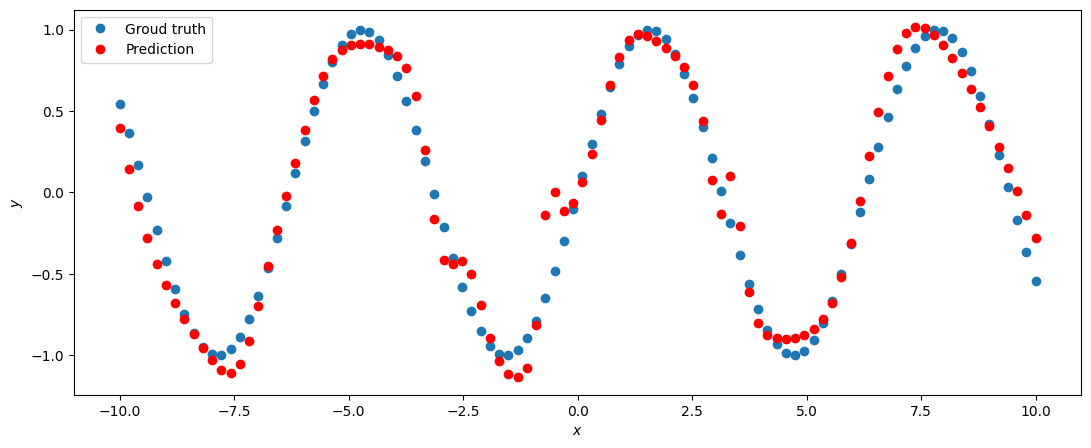

Neurons: 10
Epoch 100, Loss 0.13726173341274261
Epoch 200, Loss 0.13326898217201233
Epoch 300, Loss 0.1351964771747589
Epoch 400, Loss 0.1426287144422531
Epoch 500, Loss 0.13369424641132355
Epoch 600, Loss 0.13458940386772156
Epoch 700, Loss 0.1351298838853836
Epoch 800, Loss 0.1364556849002838
Epoch 900, Loss 0.12950217723846436
Epoch 1000, Loss 0.14518238604068756


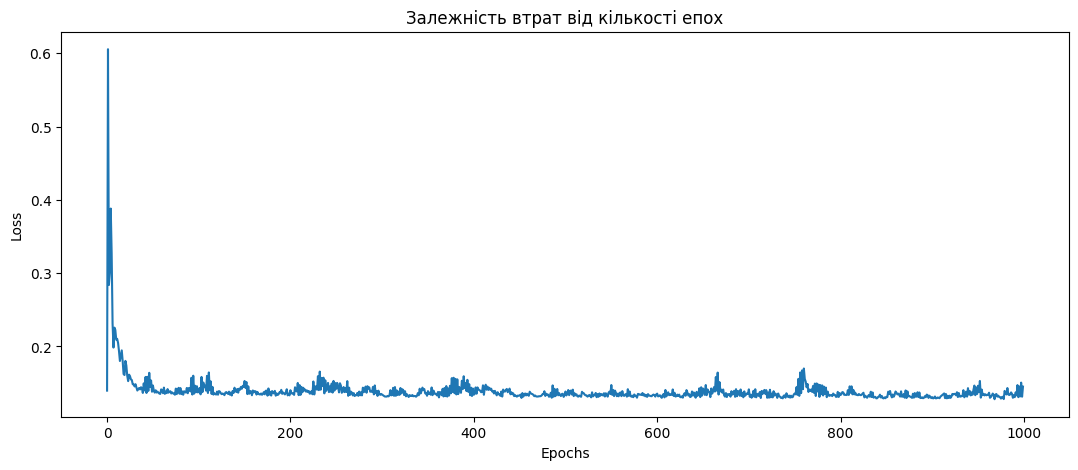

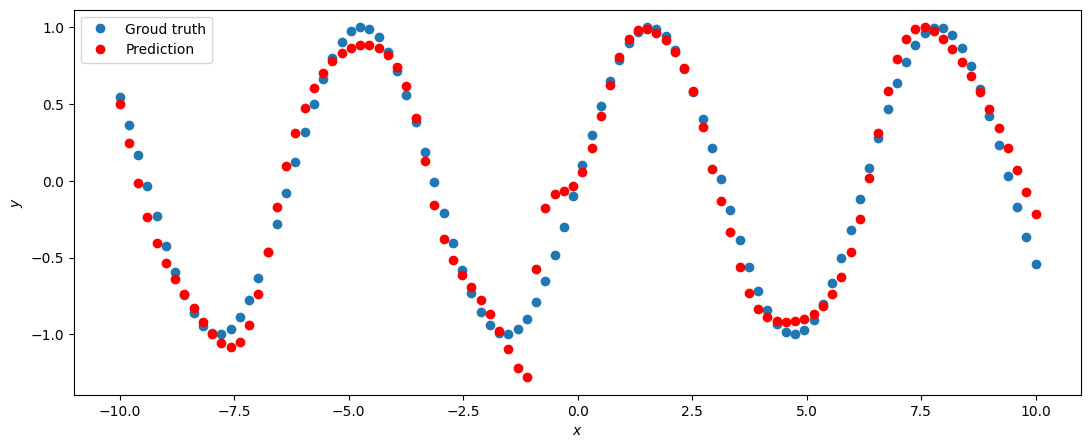

In [180]:
for net in nets_tanh_2_hidden:
    print(f'Neurons: {net.fc1.out_features}')
    train(net, x_train, y_train, 1000)
    plt.show()

## Завдання 2


In [181]:
! pip install openpyxl scikit-learn seaborn --quiet

1) Завантаження даних та аналіз кореляції

Беремо значення X1-X5

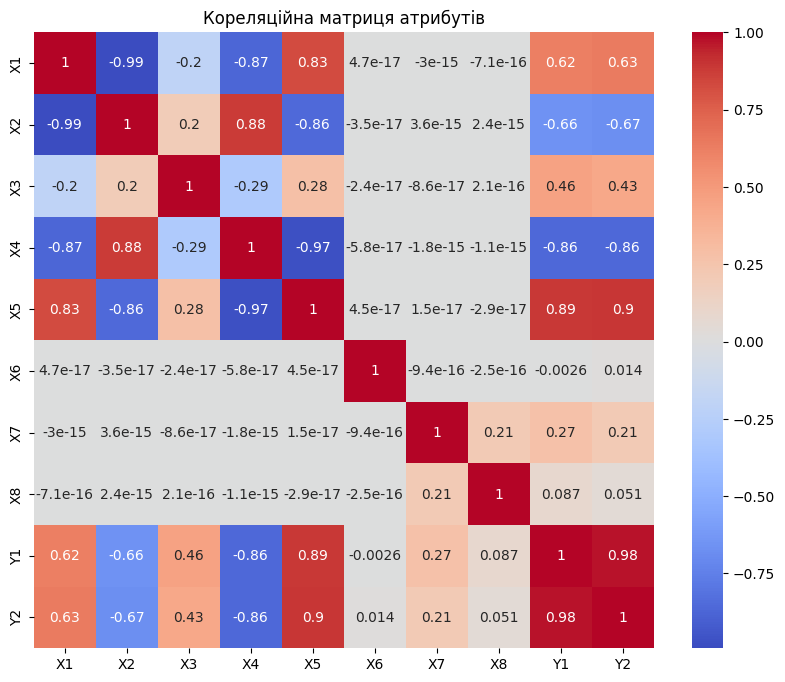

In [183]:
import pandas as pd
import torch
import torch.nn as nn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'
data = pd.read_excel(url)

corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.title("Кореляційна матриця атрибутів")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [135]:
# Вибираємо атрибути з найбільшою кореляцією з y1
selected_features = ['X1', 'X2', 'X3', 'X4', 'X5']  # Залишаємо тільки ті ознаки, які мають сильну кореляцію
X = data[selected_features]
y1 = data.iloc[:, 8]  # Навантаження при обігріві
y2 = data.iloc[:, 9]  # Навантаження при охолодженні

X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_val, y1_train, y1_val = train_test_split(X_train, y1_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y1_train_tensor = torch.tensor(y1_train.values, dtype=torch.float32).unsqueeze(1)
y1_val_tensor = torch.tensor(y1_val.values, dtype=torch.float32).unsqueeze(1)
y1_test_tensor = torch.tensor(y1_test.values, dtype=torch.float32).unsqueeze(1)


2) Створення нейронної мережі

In [136]:
class EnergyEfficiencyNet(nn.Module):
    def __init__(self):
        super(EnergyEfficiencyNet, self).__init__()
        self.fc1 = nn.Linear(len(selected_features), 64)  # Використовуємо кількість вибраних ознак
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = EnergyEfficiencyNet()

3) Навчання моделі

In [141]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

epochs = 400
train_losses = []
val_losses = []

for epoch in range(epochs):
    net.train()
    optimizer.zero_grad()
    y_pred = net(X_train_tensor)
    loss = loss_function(y_pred, y1_train_tensor)
    loss.backward()
    optimizer.step()

    net.eval()
    with torch.no_grad():
        val_pred = net(X_val_tensor)
        val_loss = loss_function(val_pred, y1_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

Epoch 50/400, Training Loss: 12.348001480102539, Validation Loss: 11.345296859741211
Epoch 100/400, Training Loss: 12.014827728271484, Validation Loss: 10.974286079406738
Epoch 150/400, Training Loss: 11.594910621643066, Validation Loss: 10.547951698303223
Epoch 200/400, Training Loss: 11.11145305633545, Validation Loss: 10.054702758789062
Epoch 250/400, Training Loss: 10.589120864868164, Validation Loss: 9.540130615234375
Epoch 300/400, Training Loss: 9.978583335876465, Validation Loss: 8.937880516052246
Epoch 350/400, Training Loss: 9.730195999145508, Validation Loss: 8.767705917358398
Epoch 400/400, Training Loss: 9.649835586547852, Validation Loss: 8.777524948120117


4) Оцінка та візуалізація результатів

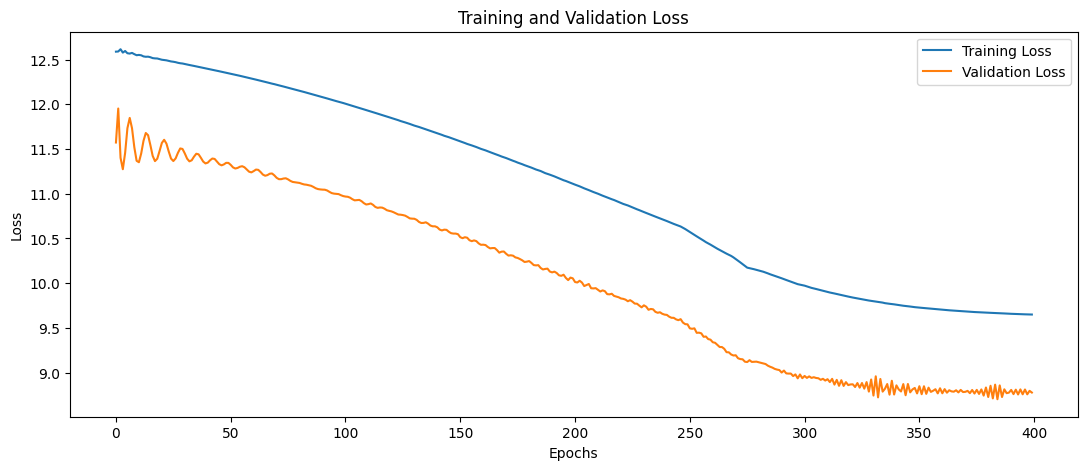

Test Loss: 9.391655921936035


In [142]:
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

net.eval()
with torch.no_grad():
    test_pred = net(X_test_tensor)
    test_loss = loss_function(test_pred, y1_test_tensor)

print(f'Test Loss: {test_loss.item()}')

## Завдання 3

1) Завантаження та підготовка даних

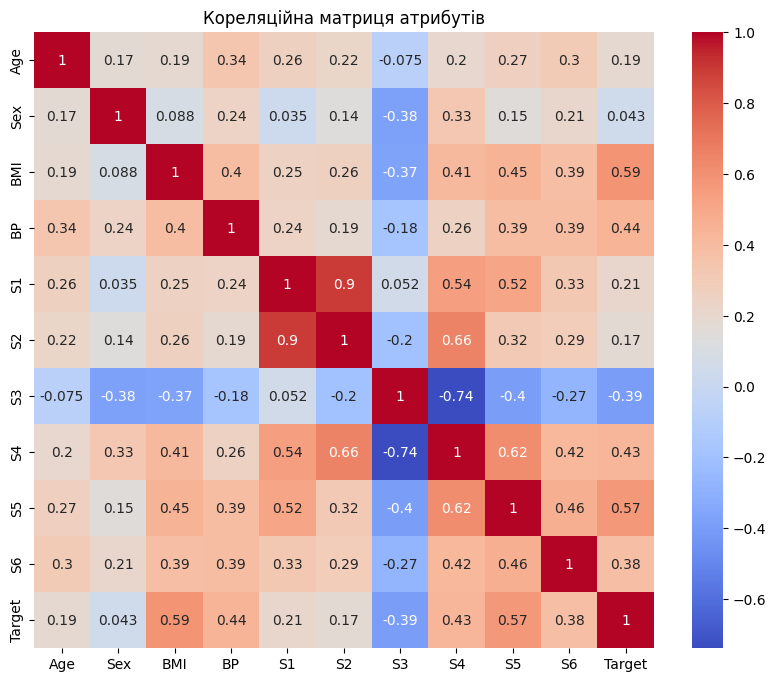

In [153]:
from sklearn import datasets
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Завантаження даних про діабет
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Перетворення у DataFrame для аналізу кореляції
columns = ['Age', 'Sex', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
data = pd.DataFrame(diabetes_X, columns=columns)
data['Target'] = diabetes_y

# Аналіз кореляції
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
plt.title("Кореляційна матриця атрибутів")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [154]:
# Вибираємо атрибути з найбільшою кореляцією з цільовою змінною
selected_features = ['BMI', 'BP', 'S3', 'S4', 'S5', 'S6']
X = data[selected_features]
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

2) Створення нейронної мережі

In [155]:
class DiabetesNet(nn.Module):
    def __init__(self):
        super(DiabetesNet, self).__init__()
        self.fc1 = nn.Linear(len(selected_features), 64)  # Використовуємо вибрані ознаки
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = DiabetesNet()

3) Навчання моделі

In [156]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
loss_function = nn.MSELoss()

epochs = 500
train_losses = []
val_losses = []

for epoch in range(epochs):
    net.train()
    optimizer.zero_grad()
    y_pred = net(X_train_tensor)
    loss = loss_function(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    net.eval()
    with torch.no_grad():
        val_pred = net(X_val_tensor)
        val_loss = loss_function(val_pred, y_val_tensor)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())

    if (epoch + 1) % 50 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

Epoch 50/500, Training Loss: 27040.478515625, Validation Loss: 30896.306640625
Epoch 100/500, Training Loss: 20550.59765625, Validation Loss: 23378.158203125
Epoch 150/500, Training Loss: 9360.642578125, Validation Loss: 10670.3056640625
Epoch 200/500, Training Loss: 5224.90869140625, Validation Loss: 5732.15087890625
Epoch 250/500, Training Loss: 4517.2177734375, Validation Loss: 4813.12646484375
Epoch 300/500, Training Loss: 4009.647216796875, Validation Loss: 4169.27685546875
Epoch 350/500, Training Loss: 3675.904541015625, Validation Loss: 3732.095947265625
Epoch 400/500, Training Loss: 3469.059814453125, Validation Loss: 3439.23388671875
Epoch 450/500, Training Loss: 3335.989990234375, Validation Loss: 3250.612060546875
Epoch 500/500, Training Loss: 3244.802490234375, Validation Loss: 3121.633056640625


4) Оцінка та візуалізація результатів

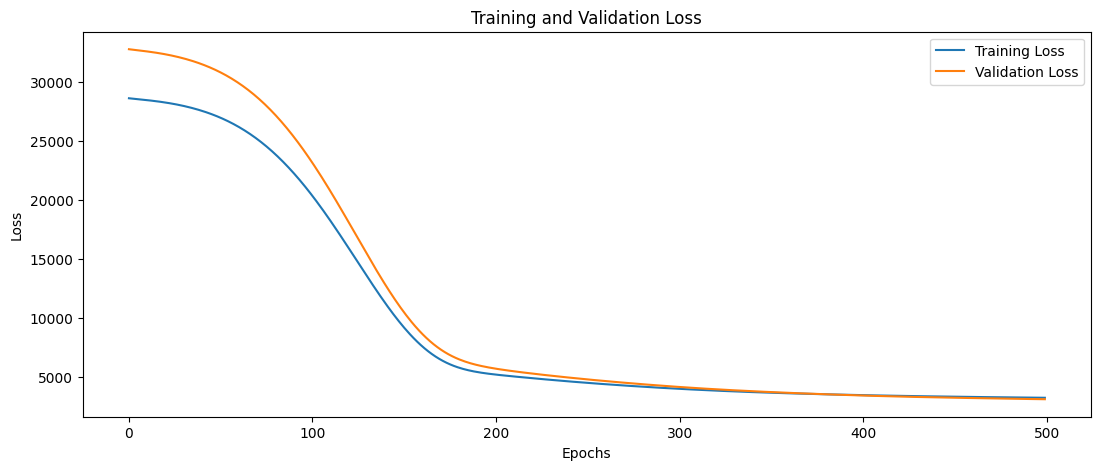

Test Loss: 3083.939208984375


In [157]:
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

net.eval()
with torch.no_grad():
    test_pred = net(X_test_tensor)
    test_loss = loss_function(test_pred, y_test_tensor)

print(f'Test Loss: {test_loss.item()}')